In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from mlens.visualization import corrmat
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import scipy.stats as stats

#Immport Pipeline 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer

#Import Imputers
from sklearn.impute import SimpleImputer, KNNImputer
from feature_engine.imputation import MeanMedianImputer
## from pandas_profiling import ProfileReport

#Import Scalers
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import MinMaxScaler

#Import Descretiser
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.wrappers import SklearnTransformerWrapper

#Import Algorithms 
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier 
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier 

#Import Tensorflolw
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout

from tensorflow.keras.optimizers import Adam, Adagrad, Adamax, Nadam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, TensorBoard
import tensorflow as tf

#Import Keras
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense


#Import GridSearch
from sklearn.model_selection import GridSearchCV

#Import Metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import (classification_report, 
                             confusion_matrix,
                             roc_auc_score,
                             accuracy_score,
                             precision_score, 
                             recall_score, 
                             f1_score)

#import Geopandas 
import requests, json
import geopandas as gpd
import pycountry

#remove warning
import warnings
warnings.simplefilter('ignore')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

###Some Functions

In [ ]:
'''
Function to train model with GridSearchCV
'''

def train_ann_GridsearchCV(X_train, y_train, X_test, y_test, units=[50, 100], dropout_rate=[0.2, 0.4], epochs=[100], batch_size=[32, 64], optimizer='adam', learning_rate=[0.01, 0.001, 0.0001], patience=5, verbose = 1, early_stopping = True, shuffle = False, validation_split = 0.2):

    def create_lstm_model(units = 25, dropout_rate=0.2, optimizer='adam', learning_rate=0.001):
        model = Sequential()
        model.add(Dense(units, activation = 'relu'))
        model.add(Dense(units, activation = 'relu'))
        model.add(Dense(1, activation = 'linear'))
        model.compile(optimizer=optimizer, loss='mean_squared_error')
        return model

    # Define the parameter grid
    param_grid = {
        'units': units,
        'dropout_rate': dropout_rate,
        'epochs': epochs,
        'batch_size': batch_size,
        'optimizer': [optimizer],
        'learning_rate': learning_rate
    }

    # Create the estimator
    estimator = KerasRegressor(build_fn=create_lstm_model)

    # Set up EarlyStopping callback
    callbacks = []
    if early_stopping:
        early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = patience, verbose = verbose)
        callbacks.append(early_stopping_callback)

    # Set up the GridSearchCV object
    grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=3, scoring = 'accuracy', verbose=verbose)

    # Fit the GridSearchCV object to the data
    grid_result = grid.fit(X_train, y_train, validation_split=validation_split, callbacks=callbacks)

    # Print the best parameters and score
    print(f"Best parameters: {grid_result.best_params_}")
    print(f"Best score: {grid_result.best_score_}")

    # Get the best model from the GridSearchCV object
    best_model = grid_result.best_estimator_

    # Train the best model on the full training set
    history = best_model.fit(X_train, y_train, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], verbose=verbose, callbacks=callbacks, validation_split=validation_split)


    return best_model, history, #test_score


In [ ]:
'''
function checking data for missing values
'''
def checkDataForNulls (data):
    percent_missing = data.isnull().sum() / len(data)
    missing_value_df = pd.DataFrame({'Column': data.columns,
                                 'percent_missing': percent_missing})
    print(missing_value_df)

In [ ]:
'''Creating a set of diagnostic plots for a given variable in a pandas DataFrame.

The function creates a figure with three subplots: a histogram of the variable's values, 
a probability plot (also known as a Q-Q plot) that shows how well the variable's distribution fits a normal distribution, and a box plot that shows the variable's distribution and potential outliers.'''
def diagnostic_plots(df, variable):
    plt.figure(figsize = (15, 6))
    plt.subplot(1, 3, 1)
    df[variable].hist()
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist = 'norm', plot = plt)
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title("Boxplot")
    
    plt.show()

In [ ]:
##function for calculating metrics after model training and to evaluate their metrics scores
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    print(f"R2: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    return 

## Importing dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/team_project4/Car_Purchasing_Data_TP.csv', encoding =  "ISO-8859-1")

In [ ]:
'''
checking the dataset that's imported
'''
data

Customer Name                                    Customer e-mail  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   
499            Marla                          Camaron.marla@hotmail.com   

          Country  Gender        Age  Annual Salary  Credit Card Debt  \
0        Bulgaria     0.0  41.851720    62812.09301      11609.380910   
1          Belize     0.0  40.870623    66646.89292       9572.957136   
2         Algeria     1.0  43.152897    53798.55112      11160.355060   
3    Cook Islands     1.0  58.271369    79370.03798      14426.164850   
4          Brazil     1.0        NaN    59729.15130               NaN   
..            ...     ...        ...            ...               ...   
495         Nepal     0.0  41.462515    71942.40291       6995.902524   
496      Zimbabwe     1.0  37.642000    56039.49793      12301.456790   
497   Philippines     1.0  53.943497    68888.77805      10611.606860   
498      Botswana     1.0  59.160509    49811.99062      14013.034510   
499        marlal     1.0  46.731152    61370.67766       9391.341628   

       Net Worth  Car Purchase Amount  
0    238961.2505          35321.45877  
1    530973.9078          45115.52566  
2    638467.1773          42925.70921  
3    548599.0524          67422.36313  
4    560304.0671          55915.46248  
..           ...                  ...  
495  541670.1016          48901.44342  
496  360419.0988          31491.41457  
497  764531.3203          64147.28888  
498  337826.6382          45442.15353  
499  462946.4924          45107.22566  

[500 rows x 9 columns]

## Data Analysis

In [ ]:
'''
checking for variables for missing values
'''
checkDataForNulls(data = data)

                                  Column  percent_missing
Customer Name              Customer Name            0.016
Customer e-mail          Customer e-mail            0.030
Country                          Country            0.018
Gender                            Gender            0.036
Age                                  Age            0.026
Annual Salary              Annual Salary            0.022
Credit Card Debt        Credit Card Debt            0.036
Net Worth                      Net Worth            0.032
Car Purchase Amount  Car Purchase Amount            0.000


In [ ]:
'''
missing values sum in variables
'''
data.isnull().sum()

Customer Name           8
Customer e-mail        15
Country                 9
Gender                 18
Age                    13
Annual Salary          11
Credit Card Debt       18
Net Worth              16
Car Purchase Amount     0
dtype: int64

In [ ]:
## checking info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        492 non-null    object 
 1   Customer e-mail      485 non-null    object 
 2   Country              491 non-null    object 
 3   Gender               482 non-null    float64
 4   Age                  487 non-null    float64
 5   Annual Salary        489 non-null    float64
 6   Credit Card Debt     482 non-null    float64
 7   Net Worth            484 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(6), object(3)
memory usage: 35.3+ KB


In [ ]:

## the number of discrete variables and continious variables
discrete =  [var for var in data.columns if data[var].dtype !='O' and var != 'Car Purchase Amount' and data[var].nunique() < 10]
continious = [var for var in data.columns if data[var].dtype !='O' and var != 'Car Purchase Amount' and var not in discrete]


categorical = [var for var in data.columns if data[var].dtype == 'O']

print ('There are {} discrete variables'.format(len(discrete)))
print ('There are {} continuous variables'.format(len(continious)))

There are 1 discrete variables
There are 4 continuous variables


In [ ]:
## just variable Gender is defined as discrete
discrete

['Gender']

In [ ]:
## while 4 variables are considered as continious
continious

['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']

In [ ]:
'''
checking for dataset description
'''
data.describe()

Gender         Age  Annual Salary  Credit Card Debt  \
count  482.000000  487.000000     489.000000        482.000000   
mean     0.504149   46.119832   62095.026436       9665.469482   
std      0.500502    7.951596   11710.511901       3475.182336   
min      0.000000   20.000000   20000.000000        100.000000   
25%      0.000000   40.872999   54395.053560       7413.453460   
50%      1.000000   45.768823   62812.093010       9670.271017   
75%      1.000000   51.461245   70111.539800      11874.294412   
max      1.000000   70.000000  100000.000000      20000.000000   

            Net Worth  Car Purchase Amount  
count      484.000000           500.000000  
mean    429810.886870         44209.799225  
std     172843.017385         10773.178740  
min      20000.000000          9000.000000  
25%     299530.597525         37629.898597  
50%     421605.411200         43997.783390  
75%     556984.146550         51254.709517  
max    1000000.000000         80000.000000

In [ ]:
## finding the 5 largest values in the 'Car Purchase Amount' column
data.nlargest(5, 'Car Purchase Amount')

Customer Name                               Customer e-mail  \
315  Cameron, Kimberley P.                      nec.tellus@lacinia.co.uk   
289     Madeson R. Salinas              Cum.sociis.natoque@acnullaIn.edu   
400                Melodie                 facilisi.Sed@tortordictum.com   
470                  Diana  purus.ac.tellus@parturientmontesnascetur.org   
45             Quincy Bell                          in@Duisgravida.co.uk   

                              Country  Gender        Age  Annual Salary  \
315                           Namibia     1.0  55.017566    83333.81054   
289  Bonaire, Sint Eustatius and Saba     0.0  48.256556    86565.15641   
400                      Korea, South     1.0  61.704299    66655.41420   
470                        Guadeloupe     0.0  59.619615    81565.95967   
45                        Timor-Leste     0.0  55.275143            NaN   

     Credit Card Debt     Net Worth  Car Purchase Amount  
315       9874.075327  1000000.0000          80000.00000  
289      13701.799860   819002.1748          70878.29664  
400       8001.644302   805075.5197          70598.96768  
470       9072.063059   544291.9504          69669.47402  
45       10155.340950           NaN          68925.09447

In [ ]:
## finding the 5 largest values in the 'Net Worth' column
data.nlargest(5, 'Net Worth')

Customer Name                                    Customer e-mail  \
315  Cameron, Kimberley P.                           nec.tellus@lacinia.co.uk   
104            Yasir Tyler  pharetra.sed.hendrerit@adipiscinglobortisrisus...   
375         Smith, Nola H.             orci.lacus.vestibulum@gravidasit.co.uk   
345        Burke, Simon H.                                 lacinia@Nullam.com   
218        Pamela M. Cantu                  posuere.enim.nisl@lectusNullam.ca   

                              Country  Gender        Age  Annual Salary  \
315                           Namibia     1.0  55.017566    83333.81054   
104                             Qatar     0.0  48.476396    63975.06090   
375  Saint Vincent and The Grenadines     1.0  47.217951    59205.89035   
345                           Morocco     1.0  38.633147    55618.06942   
218                             China     0.0  47.056916    62311.11641   

     Credit Card Debt     Net Worth  Car Purchase Amount  
315       9874.075327  1000000.0000          80000.00000  
104      10614.854490   891439.8761          60461.24268  
375       2689.317953   856287.1522          55700.83389  
345       7557.657205   854283.5574          46398.35204  
218       9832.057310   830430.3692          56563.98675

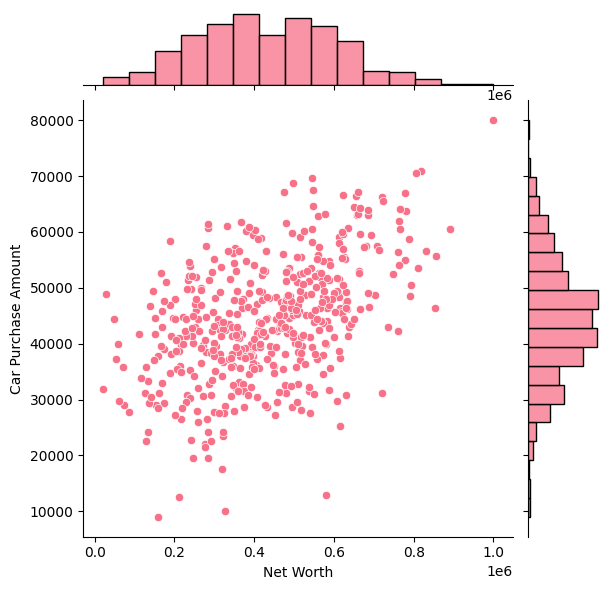

In [ ]:
## creating a scatter plot between the 'Net Worth' and 'Car Purchase Amount' variables
###displaying the joint distribution of the two variables and their marginal distributions.
sns.jointplot(x='Net Worth',y='Car Purchase Amount',data=data)

In [ ]:
## finding the 5 largest values in the 'Annual Salary' column
data.nlargest(5, 'Annual Salary')

Customer Name                        Customer e-mail  \
28         Gemma Hendrix                     lobortis@non.co.uk   
342  Flores, Caldwell U.                  ut@Etiamvestibulum.ca   
465              Vaughan                   Aliquam@aaliquet.com   
370   Daugherty, Veda M.  venenatis.vel.faucibus@iaculisnec.net   
96         Glenna Graham          sodales@maurisSuspendisse.com   

            Country  Gender        Age  Annual Salary  Credit Card Debt  \
28          Denmark     1.0  46.124036   100000.00000      17452.921790   
342  Western Sahara     0.0  40.752195    92471.17612       5404.397644   
465         Ukraine     0.0  51.441981    92455.72807       9877.169366   
370          Guinea     1.0  48.308673    91083.73918      13148.855970   
96          Bolivia     0.0  46.245735    90556.62686               NaN   

       Net Worth  Car Purchase Amount  
28   188032.0778          58350.31809  
342  515717.7476          59096.26978  
465  285326.3544          61404.22578  
370  387538.2487          60960.83428  
96   479586.9387          61593.52058

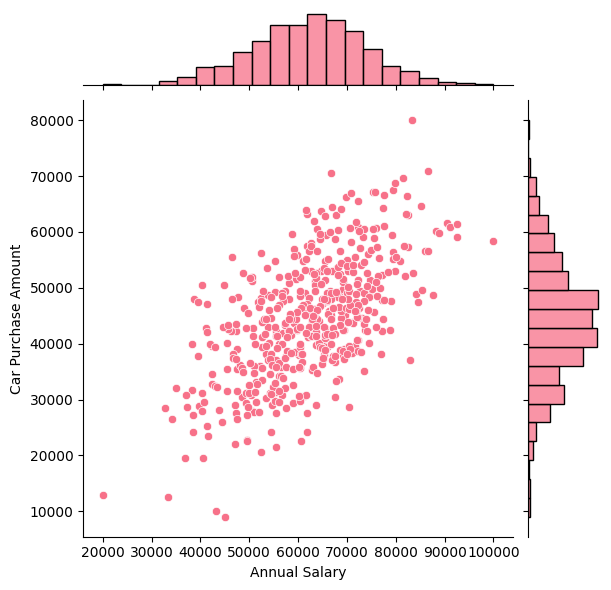

In [ ]:
## creating a scatter plot between the 'Annual Salary' and 'Car Purchase Amount' variables
###displaying the joint distribution of the two variables and their marginal distributions.
sns.jointplot(x='Annual Salary', y='Car Purchase Amount', data=data)

In [ ]:
## finding the 5 largest values in the 'Credit Card Debt' column
data.nlargest(5, 'Credit Card Debt')

Customer Name                           Customer e-mail  \
221         Laurel H. Snow     dui.Suspendisse.ac@tacitisociosqu.org   
440                    Ora  bibendum.Donec.felis@liberoestcongue.org   
253  Shaeleigh M. Mckenzie        diam.lorem.auctor@estmollisnon.net   
130           Oren Rosario  ultrices.Vivamus.rhoncus@lacusMauris.net   
404               Benjamin    nisi.Mauris.nulla@vitaeodiosagittis.ca   

              Country  Gender        Age  Annual Salary  Credit Card Debt  \
221           Andorra     1.0  36.408033    69494.69783       20000.00000   
440           Uruguay     1.0  39.665657    57777.15558       19692.91262   
253  Christmas Island     1.0  46.205241    55434.04046       18693.14652   
130          Slovenia     NaN  53.380955    69255.98753       18361.24915   
404     Faroe Islands     0.0  61.224725    61639.76386       17870.63765   

       Net Worth  Car Purchase Amount  
221  335809.6171          37303.56701  
440  601210.2803          41147.46679  
253  316906.6441          37093.92033  
130  339207.2774          51551.67997  
404  684209.5510          63868.94051

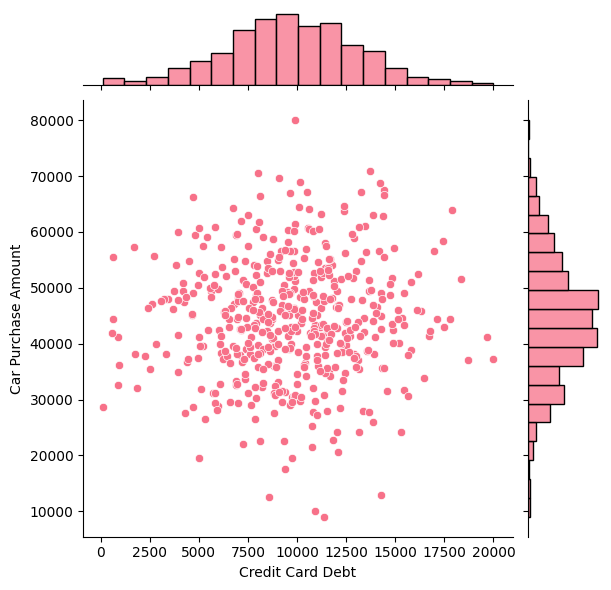

In [ ]:
## creating a scatter plot between the 'Credit Card Debt' and 'Car Purchase Amount' variables
###displaying the joint distribution of the two variables and their marginal distributions.
sns.jointplot(x='Credit Card Debt', y='Car Purchase Amount', data=data)

In [ ]:
## finding the 5 largest values in the 'Age' column
data.nlargest(5, 'Age')

Customer Name                        Customer e-mail      Country  \
194         Gil Sanders               eu.ultrices@cursuset.net        Haiti   
236      Tate C. Foster          dignissim.magna@Maurisvel.edu     Viet Nam   
246     Kylee O. Warner                  cursus.in@neque.co.uk        China   
290  Abigail X. Lindsey                          dui@nondui.ca      Croatia   
303  Chambers, Avram C.  Nunc.pulvinar.arcu@ultricesaauctor.ca  Isle of Man   

     Gender        Age  Annual Salary  Credit Card Debt    Net Worth  \
194     0.0  70.000000    52323.24480      12438.856480  346555.1716   
236     1.0  69.569306    41434.51258       6810.555606  252220.2937   
246     1.0  65.224881    70703.85013       5025.365518  284991.7415   
290     0.0  63.414531    46549.16329        640.045378  626163.8320   
303     1.0  62.868861    75719.22986      10515.281350  474485.6659   

     Car Purchase Amount  
194          56229.41270  
236          47009.57741  
246          60763.24731  
290          55543.38497  
303          67092.23276

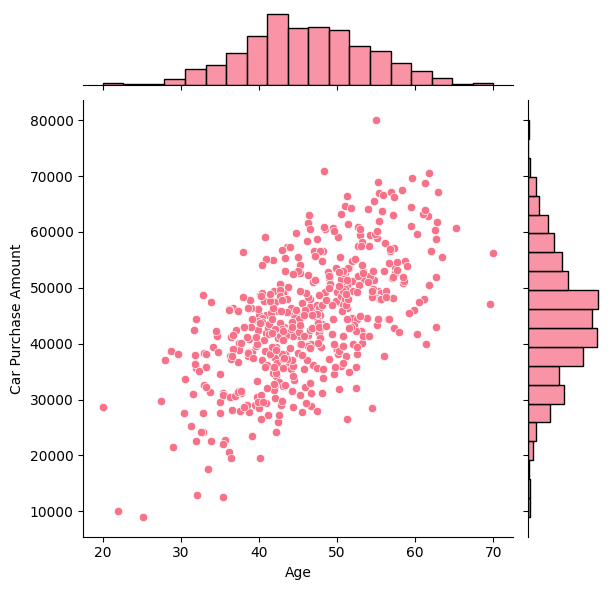

In [ ]:
## creating a scatter plot between the 'Age' and 'Car Purchase Amount' variables
###displaying the joint distribution of the two variables and their marginal distributions.
sns.jointplot(x='Age', y='Car Purchase Amount', data=data)

In [ ]:
'''
Checking the number of unique labels
'''
for col in data.columns:
    print(col, ': ', len(data[col].unique()), 'labels')

Customer Name :  491 labels
Customer e-mail :  486 labels
Country :  212 labels
Gender :  3 labels
Age :  488 labels
Annual Salary :  490 labels
Credit Card Debt :  483 labels
Net Worth :  485 labels
Car Purchase Amount :  500 labels


In [ ]:
'''
unique values inside variable Gender
'''
data['Gender'].unique()

array([ 0.,  1., nan])

In [ ]:
'''
unique values inside variable Customer Name
'''

data['Customer Name'].unique()

array(['Martina Avila', 'Harlan Barnes', 'Naomi Rodriquez',
       'Jade Cunningham', 'Cedric Leach', 'Carla Hester',
       'Griffin Rivera', 'Orli Casey', 'Marny Obrien', 'Rhonda Chavez',
       'Jerome Rowe', 'Akeem Gibson', 'Quin Smith', 'Tatum Moon',
       'Sharon Sharpe', 'Thomas Williams', nan, 'Stephen Lindsey',
       'Sloane Mann', 'Athena Wolf', 'Blythe Romero', 'Zelenia Byers',
       'Nola Wiggins', 'Micah Wheeler', 'Hedda Miranda', 'Ulric Lynn',
       'Alma Pope', 'Gemma Hendrix', 'Castor Wood', 'Herman Stevenson',
       'Adrienne Bolton', 'Dahlia Cleveland', 'Keane Browning',
       'Quon Hull', 'Coby Charles', 'Amery Cortez', 'Uriel Bradshaw',
       'Fredericka Sanders', 'Christopher Stevens', 'Rachel Ashley',
       'Lael Wright', 'Ryder Shaffer', 'Eric Noel', 'Tamara Guy',
       'Quincy Bell', 'Lee Taylor', 'Kenneth Pope', 'Reese Vance',
       'Quon Carroll', 'Magee Davidson', 'Leilani Gross',
       'Morgan William', 'Francesca Cervantes', 'Rafael Peterson',
  

In [ ]:
'''
unique values inside Customer e-mail
'''
data['Customer e-mail'].unique()

array(['cubilia.Curae.Phasellus@quisaccumsanconvallis.edu',
       'eu.dolor@diam.co.uk',
       'vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk',
       'malesuada@dignissim.com',
       'felis.ullamcorper.viverra@egetmollislectus.net',
       'mi@Aliquamerat.edu', nan,
       'nunc.est.mollis@Suspendissetristiqueneque.co.uk',
       'Phasellus@sedsemegestas.org', 'nec@nuncest.com',
       'ipsum.cursus@dui.org', 'turpis.egestas.Fusce@purus.edu',
       'nulla@ipsum.edu', 'Cras.sed.leo@Seddiamlorem.ca',
       'eget.metus@aaliquetvel.co.uk', 'aliquet.molestie@ut.org',
       'ultrices.posuere.cubilia@pedenonummyut.net',
       'erat.eget.ipsum@tinciduntpede.org', 'at.augue@augue.net',
       'volutpat.Nulla.facilisis@primis.ca', 'Sed.eu@risusNuncac.co.uk',
       'Aliquam@augue.edu', 'arcu.eu@tincidunt.org',
       'condimentum.Donec@duiCum.com', 'scelerisque@magnased.com',
       'sociis@vulputateveliteu.com', 'Nunc.mauris.Morbi@turpis.org',
       'lobortis@non.co.uk', '

In [ ]:
'''
checking for the countries
'''
data['Country'].unique()

array(['Bulgaria', 'Belize', 'Algeria', 'Cook Islands', 'Brazil',
       'Liberia', 'Syria', 'Czech Republic', 'Armenia', 'Somalia',
       'Sint Maarten', 'Greenland', 'Nicaragua', 'Palestine, State of',
       'United Arab Emirates', 'Gabon', 'Tokelau', 'Portugal', 'Chad',
       'Iraq', 'Sudan', 'Angola', 'Nigeria', 'Madagascar', nan, 'Oman',
       'Colombia', 'Namibia', 'Denmark', 'Dominican Republic',
       'Costa Rica', 'Botswana', 'Saint Pierre and Miquelon', 'France',
       'Senegal', 'Cambodia', 'Suriname', 'Turkey', 'Ethiopia',
       'French Guiana', 'Bhutan', 'Georgia', 'Mozambique', 'Nauru',
       'Timor-Leste', 'Djibouti', 'Argentina', 'Taiwan', 'Åland Islands',
       'Turks and Caicos Islands', 'Samoa', 'Vanuatu', 'Mongolia',
       'Sri Lanka', 'Guinea-Bissau', 'Egypt', 'Slovenia', 'Benin',
       'Cape Verde', 'Paraguay', 'Laos', 'Iceland', 'Viet Nam',
       'Marshall Islands', 'Germany', 'Kyrgyzstan', 'Mauritius', 'Gambia',
       'Reunion', 'Jordan', 'Slovakia'

# Step 3: Explore & Visualisation of the Dataset

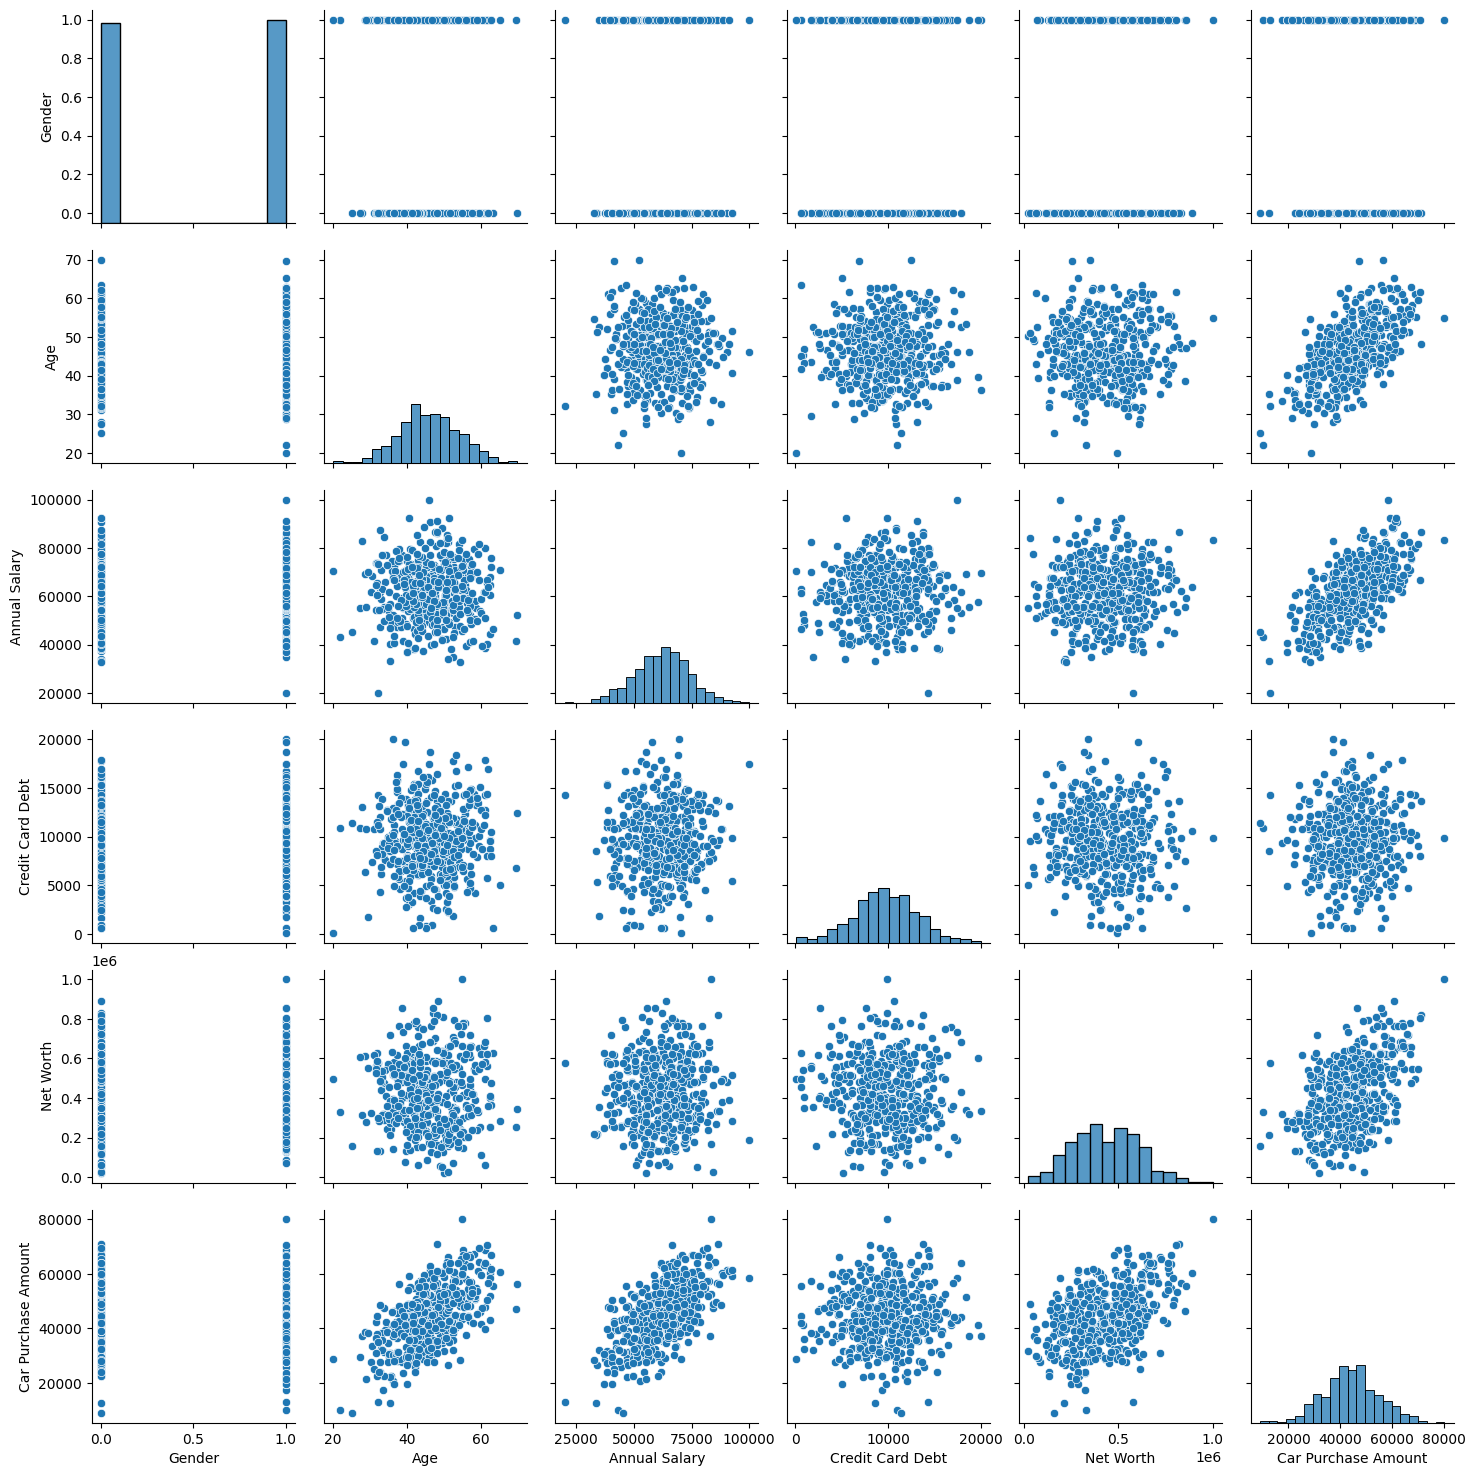

In [ ]:
'''Creating a pair plot of all variables in dataset. 
This plot will show the pairwise relationships between all variables in dataset as scatter plots.'''
plt.style.use("default")
sns.pairplot(data)

<Axes: xlabel='Gender', ylabel='count'>

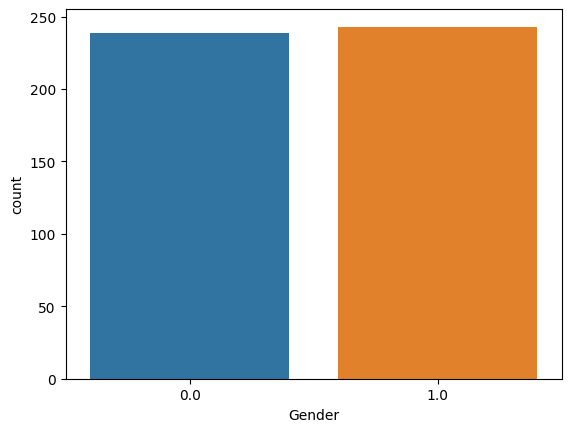

In [ ]:
### create a count plot of the 'Gender' variable in dataset. This plot will show the frequency distribution of the 'Gender' variable.
sns.countplot(data=data,x='Gender')

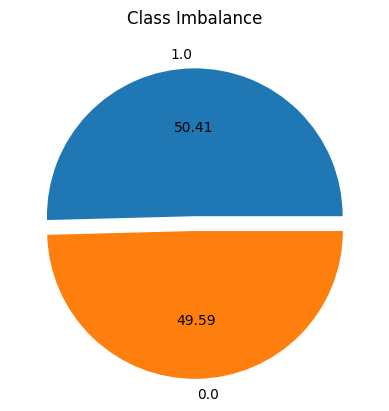

In [ ]:
## creating a pie chart of the frequency distribution of the 'Gender' variable in your dataset.
plt.pie(data['Gender'].value_counts(),labels=data['Gender'].value_counts().index,autopct='%.2f',explode=[0,0.1])
plt.title("Class Imbalance")
plt.show()

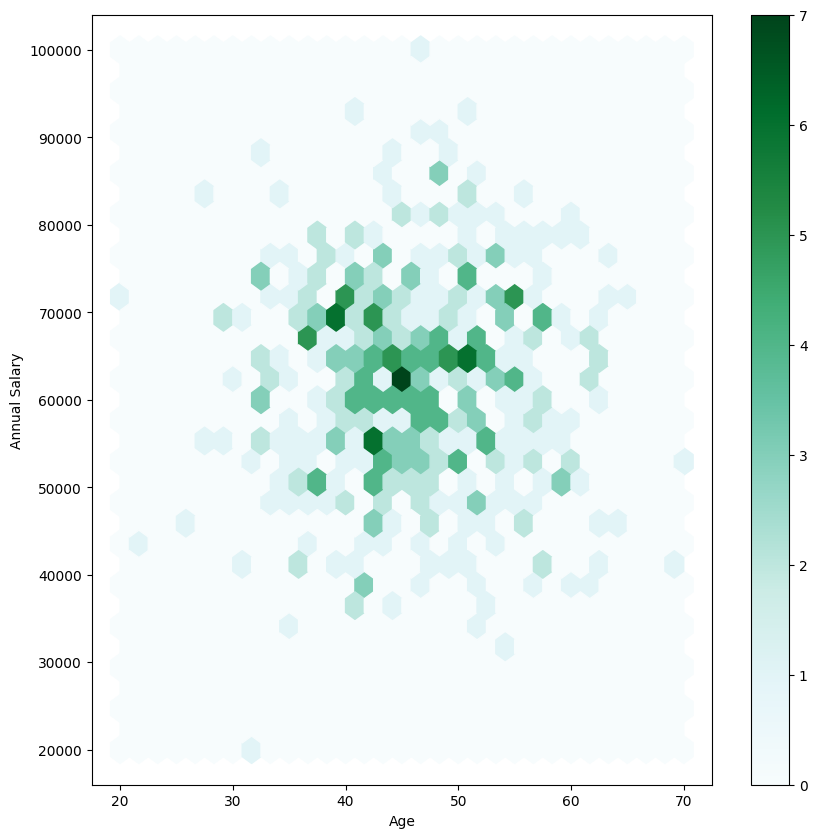

In [ ]:
''' 
showing the bivariate distribution of the two variables as a grid of hexagons, where the color of 
each hexagon indicates the number of observations falling within that bin.
'''
data.plot.hexbin(x='Age', y='Annual Salary', gridsize=30, sharex=False, figsize=(10,10))
plt.xlabel('Age')
plt.ylabel('Annual Salary')
plt.show()

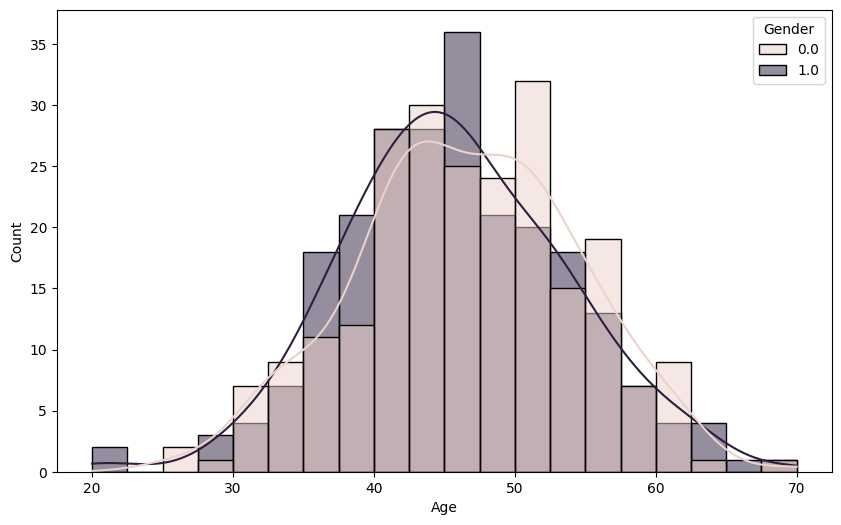

In [ ]:
'''
Creating a histogram of the 'Age' variable in the dataset, grouped by the 'Gender' variable. 
This plot is supposed to show the distribution of the 'Age' variable for each category in the 'Gender' variable.
'''
plt.figure(figsize=(10, 6))
sns.set_palette('bright')
sns.histplot(x='Age',hue='Gender',data=data, kde=True, bins=20)
plt.show()

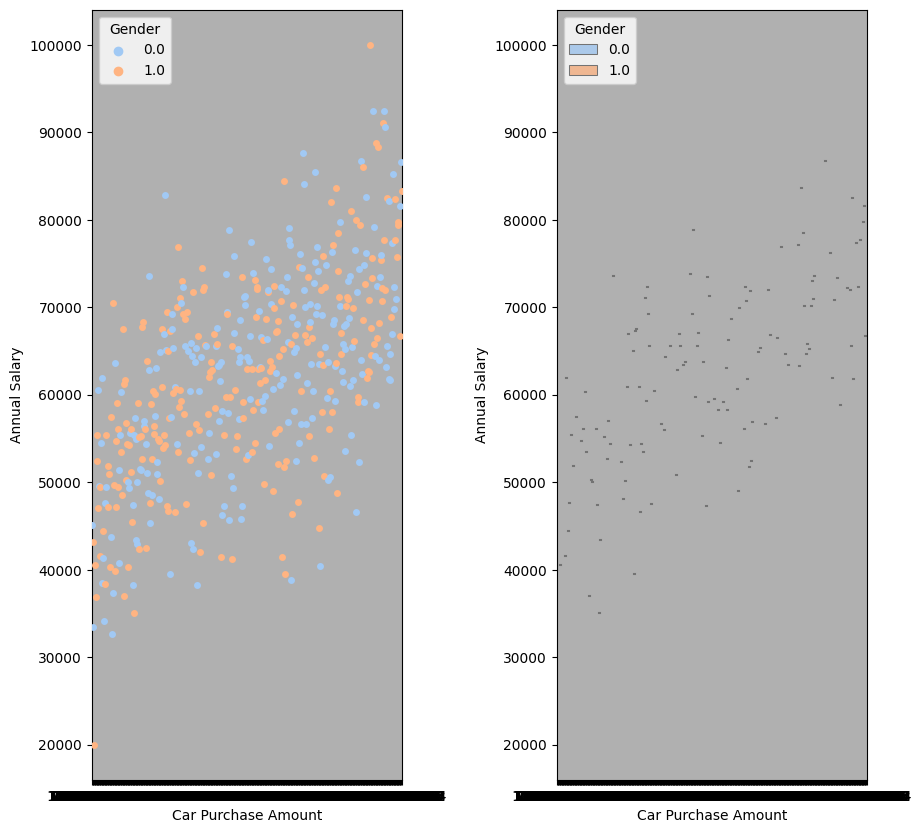

In [ ]:
'''
Creating two different types of plots for the relationship between the 'Car Purchase Amount' and 
'Annual Salary' variables in dataset, grouped by the 'Gender' variable.
'''
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
# Creating a swarm plot of the 'Car Purchase Amount' and 'Annual Salary' variables, grouped by the 'Gender' variable
sns.swarmplot(x='Car Purchase Amount', y='Annual Salary', hue='Gender', data=data, size=5, palette='pastel', ax=ax[0])

# Creating a violin plot of the 'Car Purchase Amount' and 'Annual Salary' variables, grouped by the 'Gender' variable
sns.violinplot(x='Car Purchase Amount', y='Annual Salary', hue='Gender', data=data, palette='pastel', ax=ax[1])

ax[0].grid()
ax[1].grid()
plt.subplots_adjust(wspace=0.5)

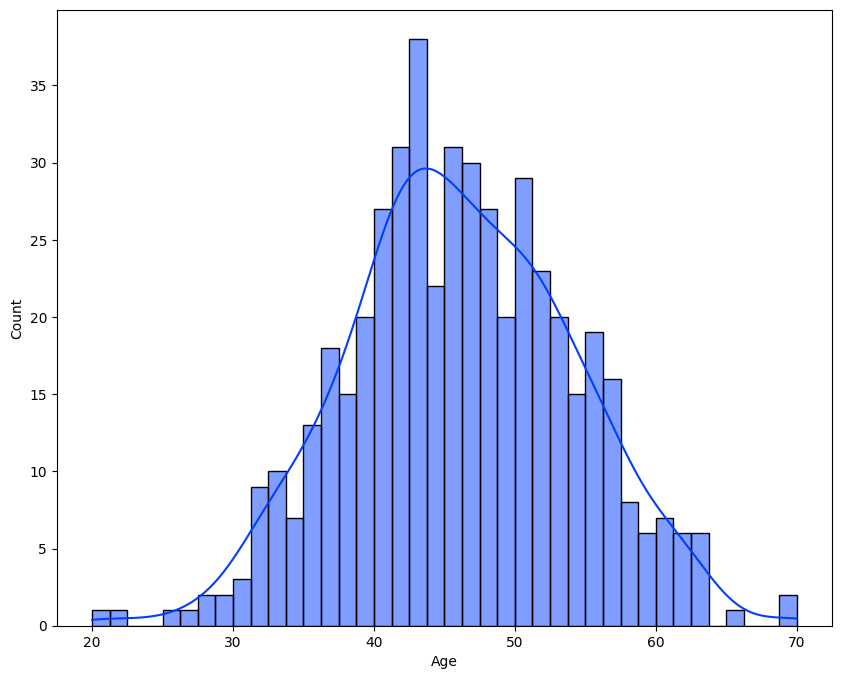

In [ ]:
'''creating a histogram of the 'Age' variable in the dataset, with a kernel density estimate (KDE) '''
plt.figure(figsize = (10,8))
sns.histplot(data['Age'], kde = True, bins = 40)
plt.show()

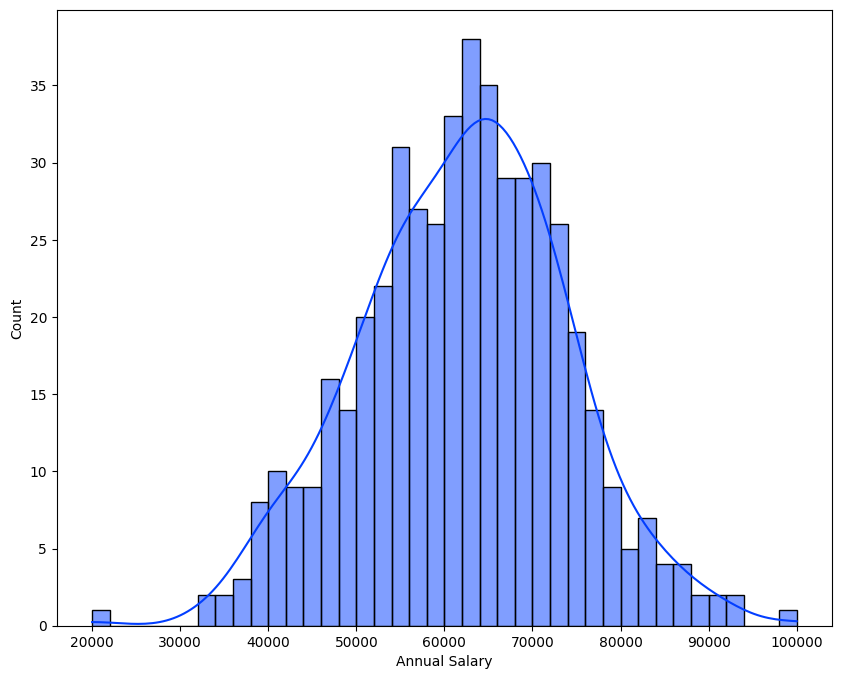

In [ ]:
'''creating a histogram of the 'Annual Salary' variable in the dataset, with a kernel density estimate (KDE) '''
plt.figure(figsize = (10,8))
sns.histplot(data['Annual Salary'], kde = True, bins = 40)
plt.show()

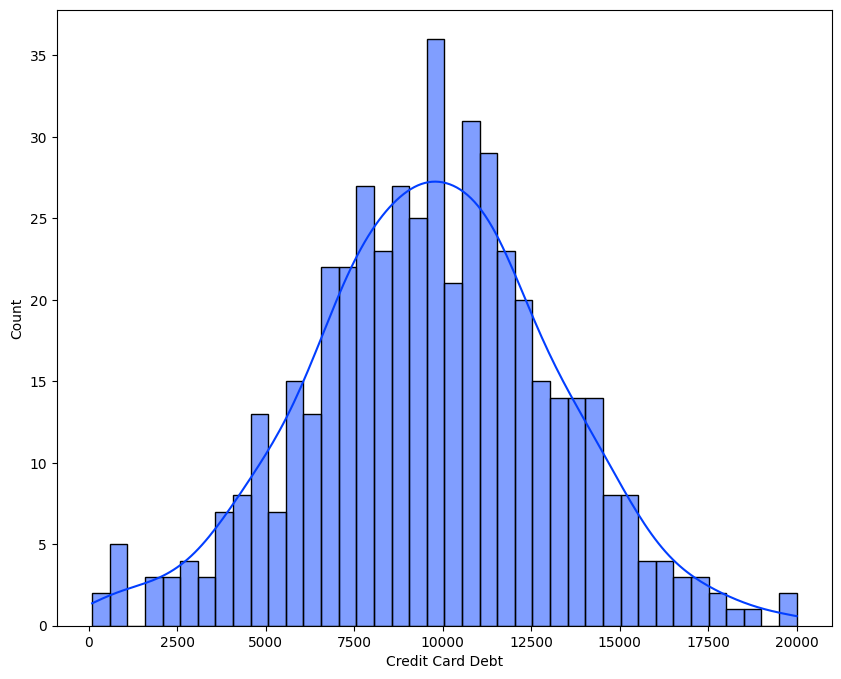

In [ ]:
'''creating a histogram of the 'Credit Card Debt' variable in the dataset, with a kernel density estimate (KDE) '''
plt.figure(figsize = (10,8))
sns.histplot(data['Credit Card Debt'], kde = True, bins = 40)
plt.show()

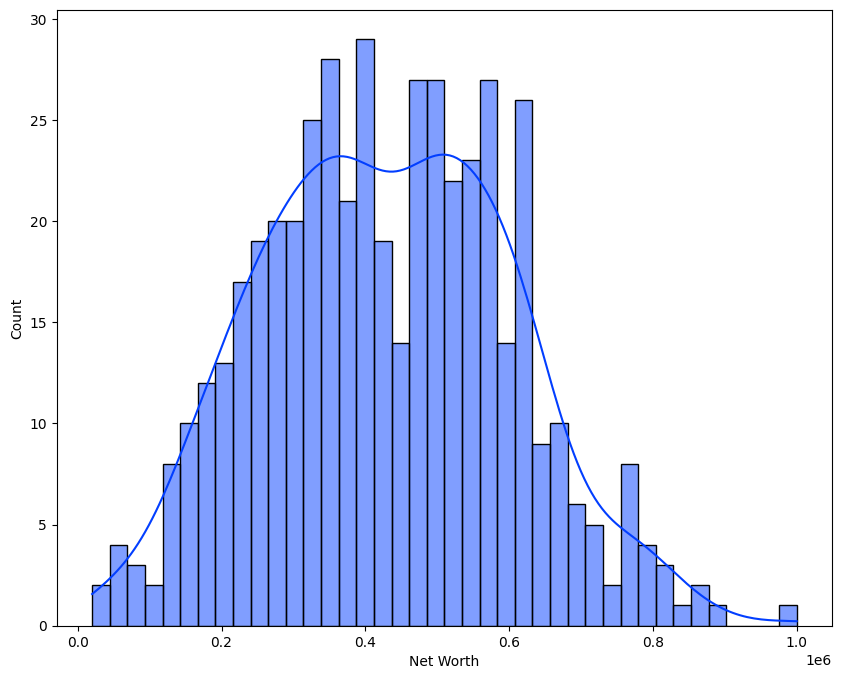

In [ ]:
'''creating a histogram of the 'New Worth' variable in the dataset, with a kernel density estimate (KDE) '''
plt.figure(figsize = (10,8))
sns.histplot(data['Net Worth'], kde = True, bins = 40)
plt.show()

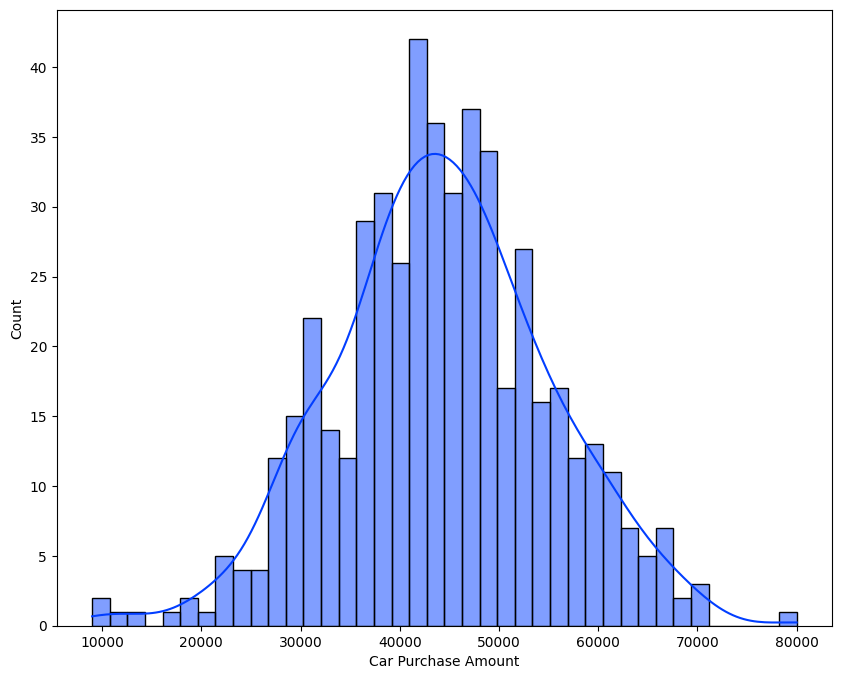

In [ ]:
'''creating a histogram of the 'Car Purchase Amount' variable in the dataset, with a kernel density estimate (KDE) '''
plt.figure(figsize = (10,8))
sns.histplot(data['Car Purchase Amount'], kde = True, bins = 40)
plt.show()

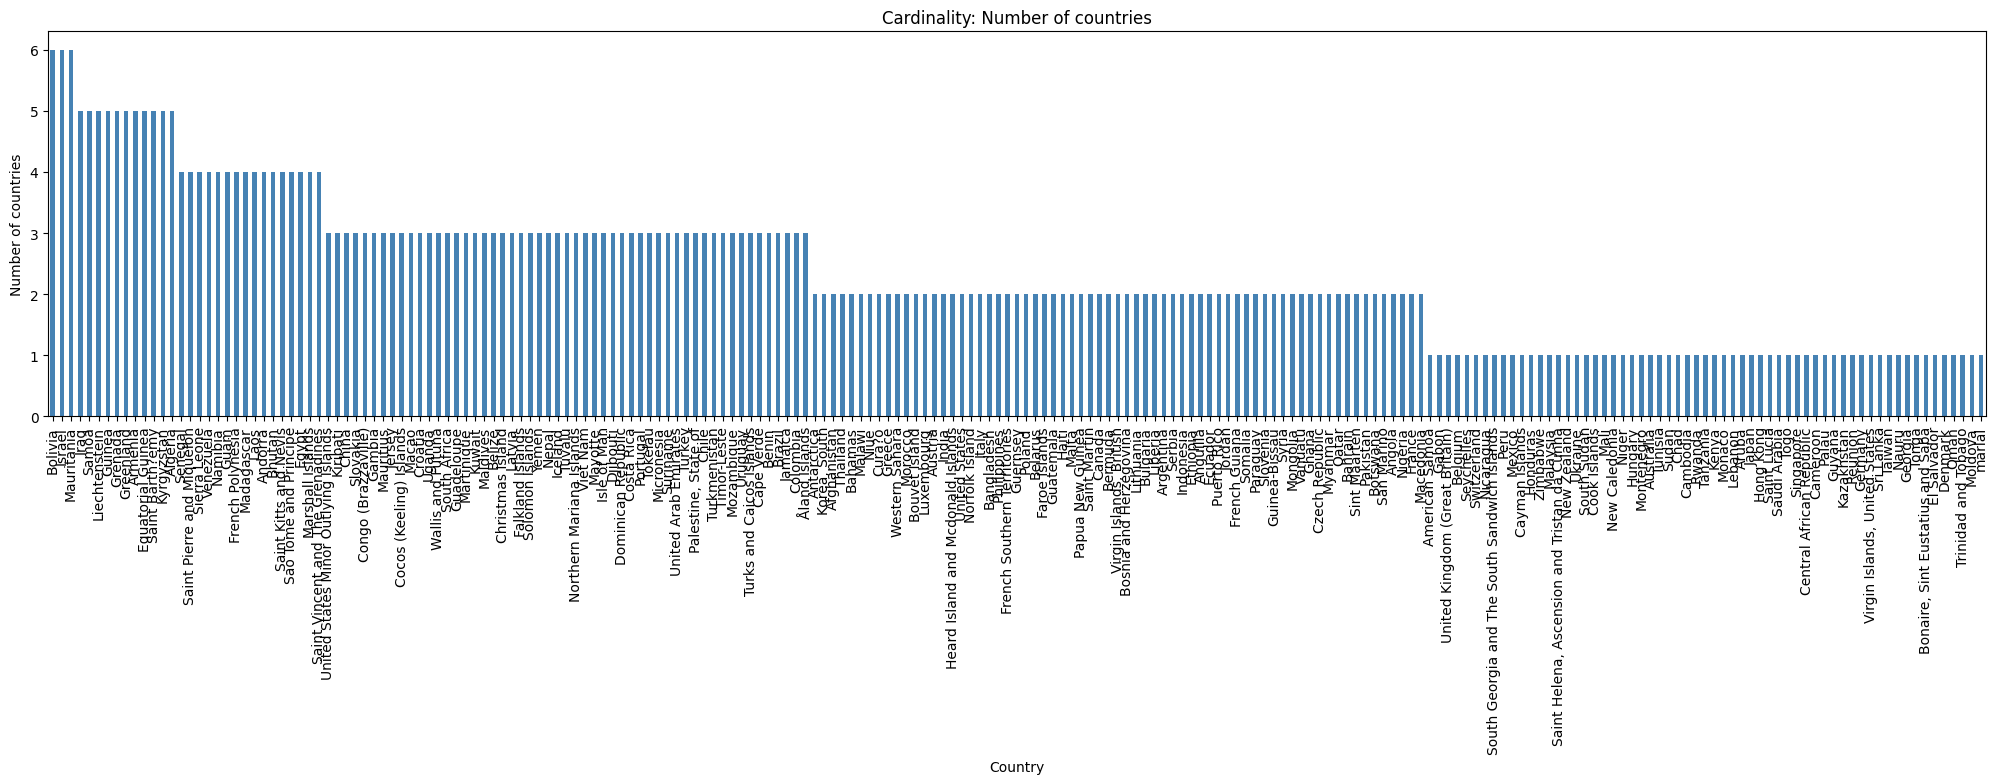

In [ ]:
'''bar chart of the number of occurrences of each country in the 'Country' variable of the dataset.'''
data.Country.value_counts().plot.bar(figsize = (25, 5), color = 'steelblue')
plt.title('Cardinality: Number of countries')
plt.xlabel('Country')
plt.ylabel('Number of countries')
plt.show()

Text(0.5, 0.98, 'Visualising continious columns')

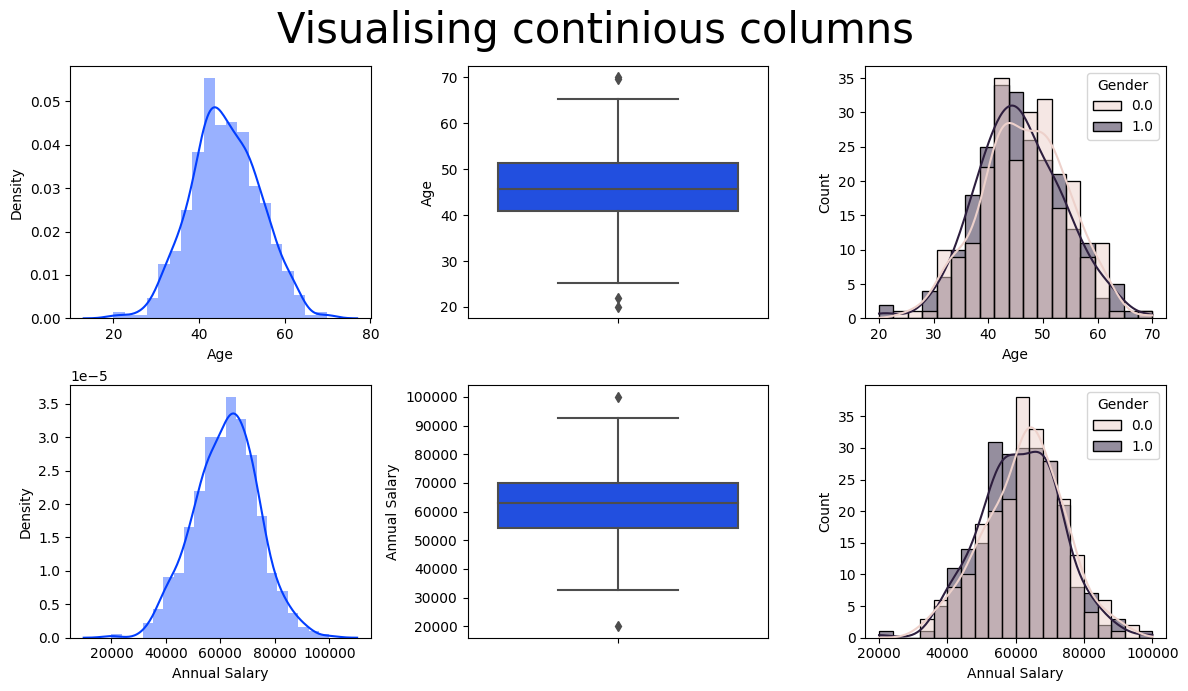

In [ ]:
'''creating a grid of six plots to visualize the continuous variables 'Age' and 'Annual Salary' in the dataset.'''
fig,ax=plt.subplots(2,3,figsize=(12, 7))
sns.distplot(data['Age'],ax=ax[0,0])
sns.boxplot(y=data['Age'],ax=ax[0,1])
sns.histplot(data=data,x='Age',ax=ax[0,2],hue='Gender',kde=True)

sns.distplot(data['Annual Salary'],ax=ax[1,0])
sns.boxplot(y=data['Annual Salary'],ax=ax[1,1])
sns.histplot(data=data,x='Annual Salary',ax=ax[1,2],hue='Gender',kde=True)
    
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.suptitle("Visualising continious columns",fontsize=30)

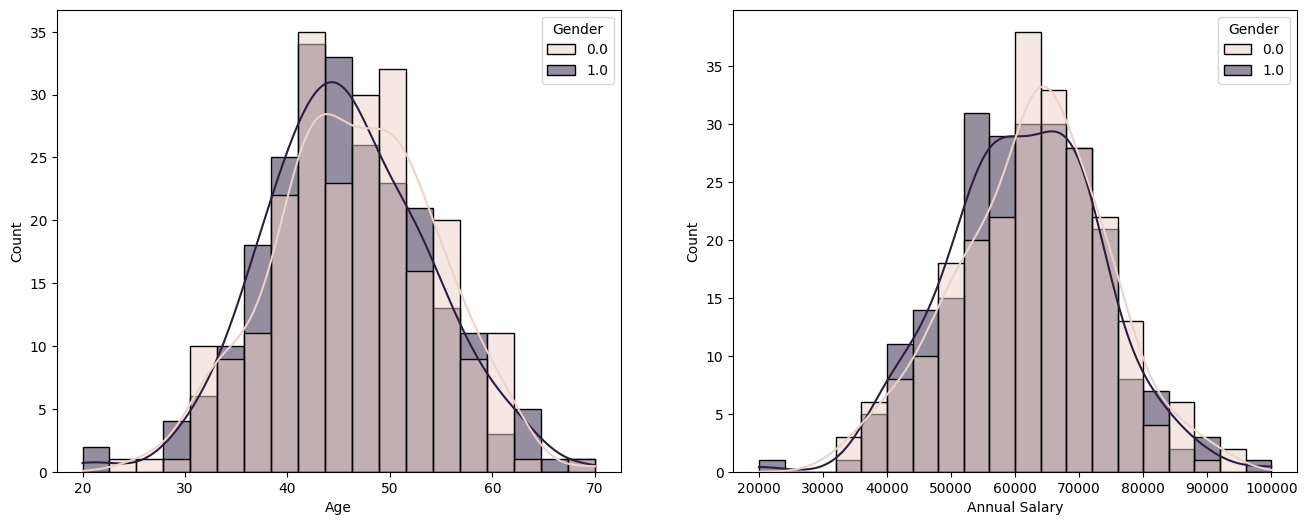

In [ ]:
'''plotting histograms with density plots on both Age and Annual Salary columns using Seaborn'''
fig,ax=plt.subplots(1,2,figsize=(16, 6))
sns.histplot(data=data,x='Age',ax=ax[0],hue='Gender',kde=True)
sns.histplot(data=data,x='Annual Salary',ax=ax[1],hue='Gender',kde=True)

plt.show()

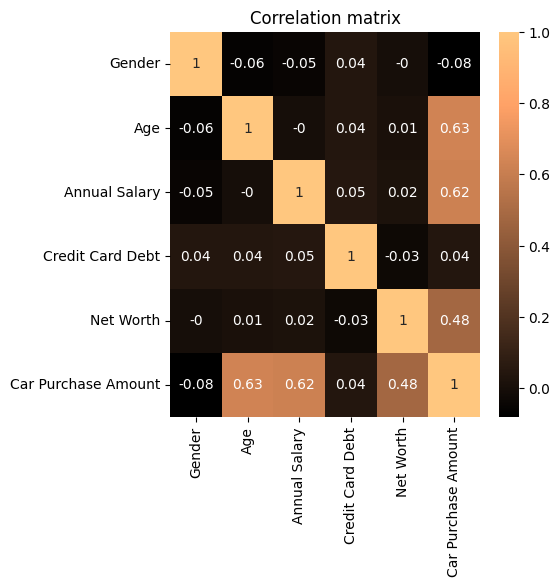

In [ ]:
'''creating a correlation matrix using Seaborn's heatmap function'''
corr = data.corr().round(2)
fig = plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot = True, cmap="copper")
plt.title("Correlation matrix")
plt.show()

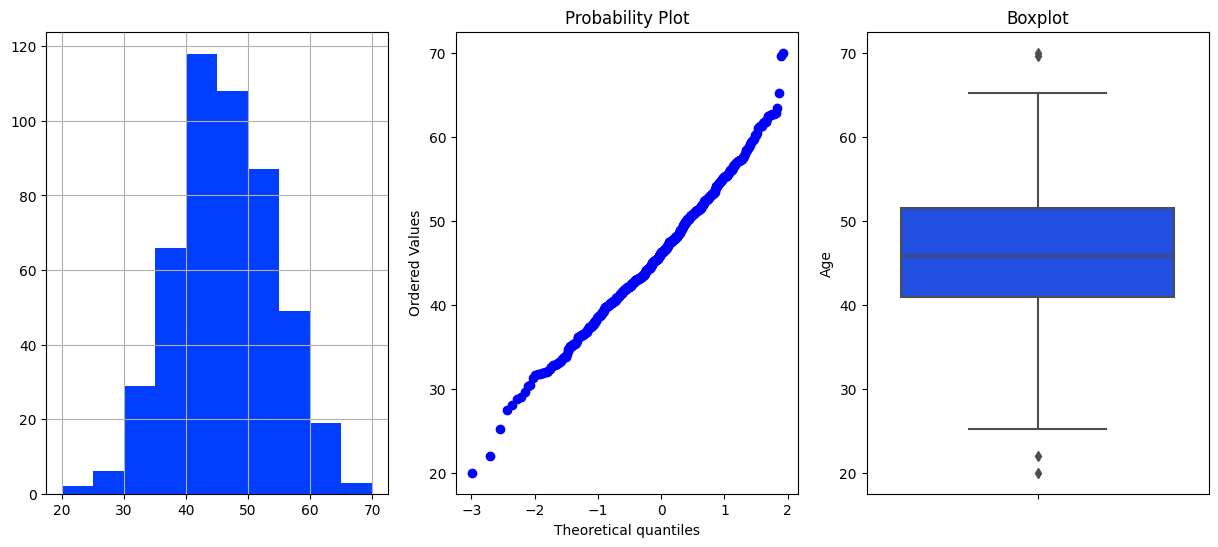

In [ ]:
'''creating a figure with three subplots: a histogram, a Q-Q plot, and a box plot of the 'Age' variable.'''
diagnostic_plots(data, 'Age')

(0.0, 83550.0)

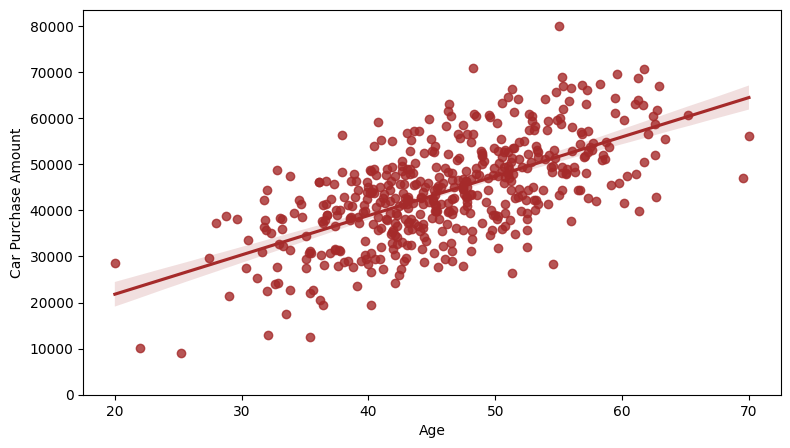

In [ ]:
'''creating a scatter plot with a regression line between Age and Car Purchase Amount '''
plt.figure(figsize=(9,5))
sns.regplot(x='Age', y='Car Purchase Amount', data=data, color = 'brown')
plt.ylim(0,)

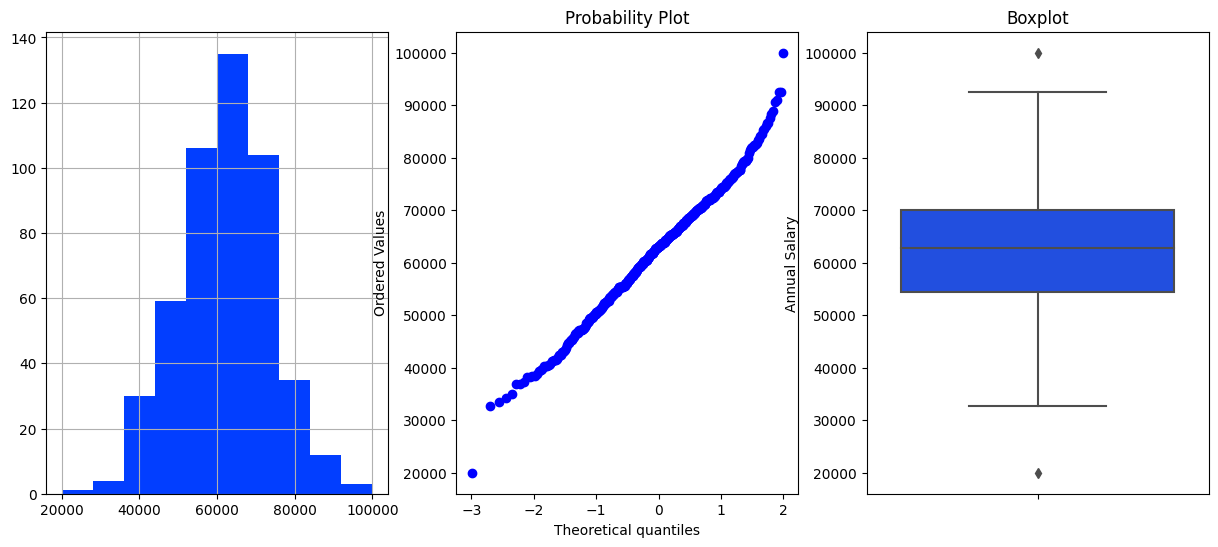

In [ ]:
'''creating a figure with three subplots: a histogram, a Q-Q plot, and a box plot of the 'Annual Salary' variable.'''
diagnostic_plots(data, 'Annual Salary')

(0.0, 83550.0)

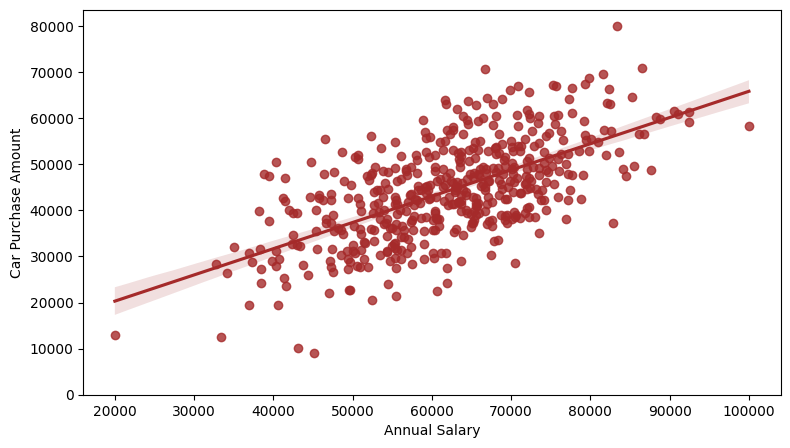

In [ ]:
'''creating a scatter plot with a regression line between Annual Salary and Car Purchase Amount '''
plt.figure(figsize=(9, 5))
sns.regplot(x='Annual Salary', y='Car Purchase Amount', data=data, color = 'brown')
plt.ylim(0,)

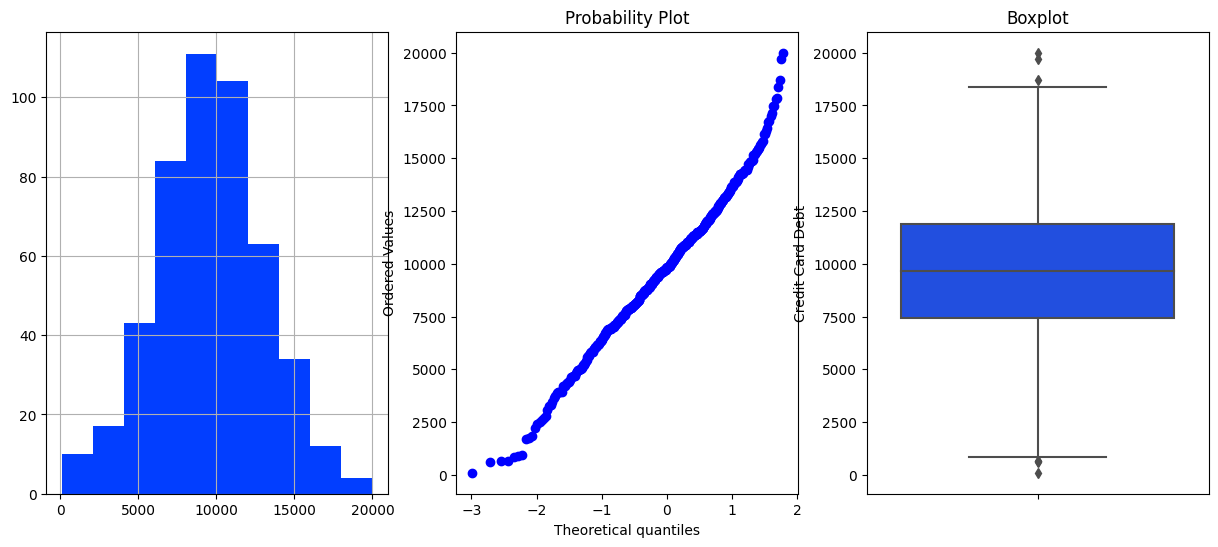

In [ ]:
'''creating a figure with three subplots: a histogram, a Q-Q plot, and a box plot of the 'Credit Card' variable.'''
diagnostic_plots(data, 'Credit Card Debt')

(0.0, 83550.0)

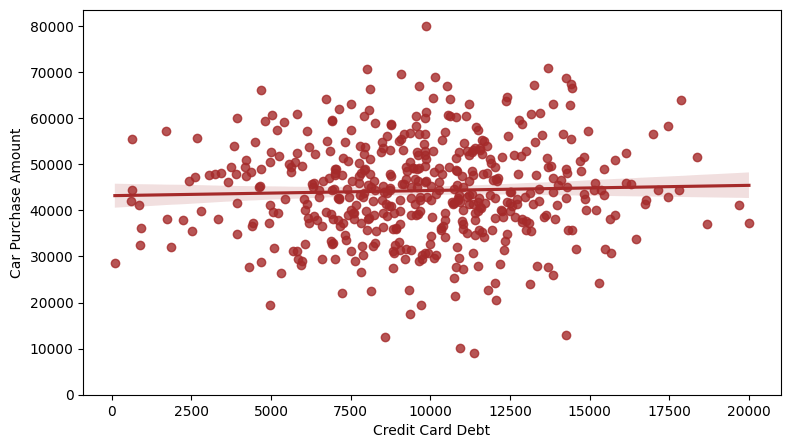

In [ ]:
'''creating a scatter plot with a regression line between Credit Card Debt and Car Purchase Amount '''
plt.figure(figsize=(9, 5))
sns.regplot(x='Credit Card Debt', y='Car Purchase Amount', data=data, color = 'brown')
plt.ylim(0,) 

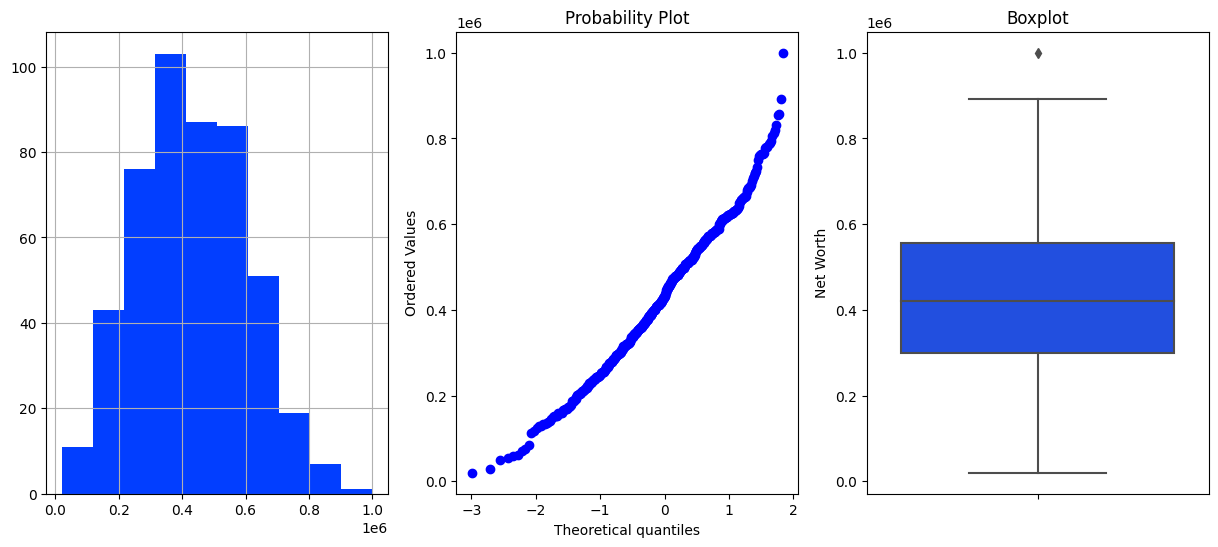

In [ ]:
'''creating a figure with three subplots: a histogram, a Q-Q plot, and a box plot of the 'New Worth' variable.'''
diagnostic_plots(data, 'Net Worth')

(0.0, 83550.0)

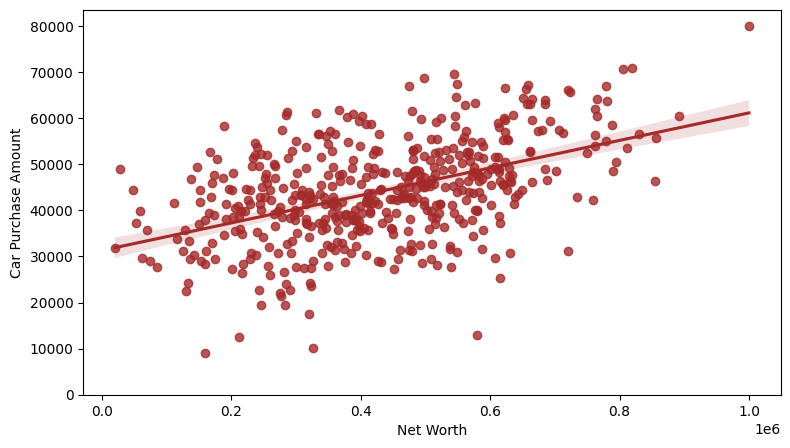

In [ ]:
'''creating a scatter plot with a regression line between Net Worth and Car Purchase Amount '''
plt.figure(figsize = (9, 5))
sns.regplot(x = 'Net Worth', y = 'Car Purchase Amount', data = data, color = 'brown')
plt.ylim(0,) 

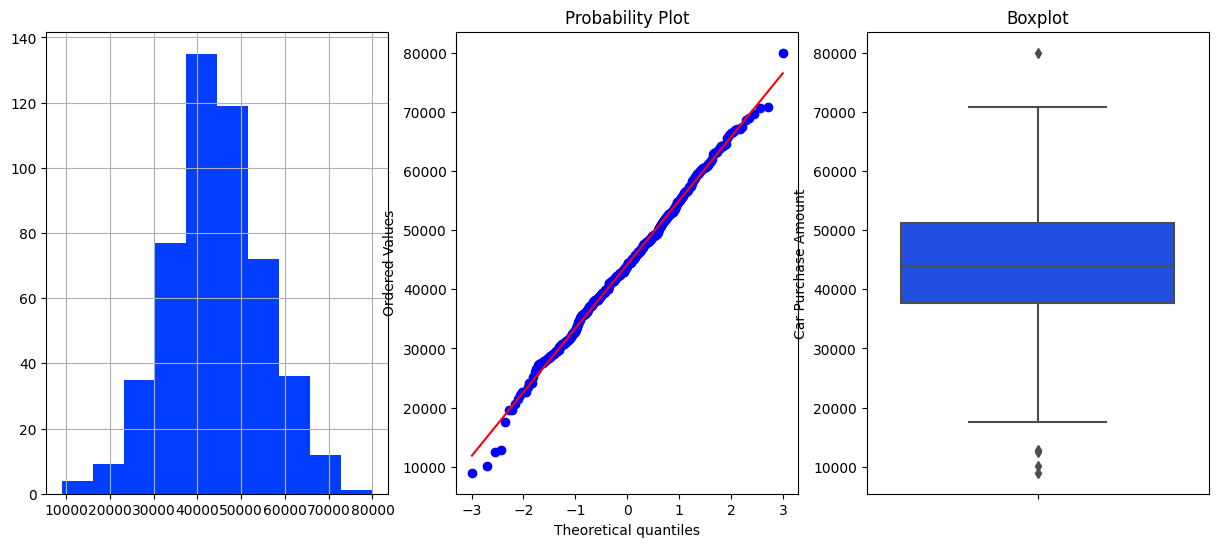

In [ ]:
'''creating a figure with three subplots: a histogram, a Q-Q plot, and a box plot of the 'Car Purchase Amount' variable.'''
diagnostic_plots(data, 'Car Purchase Amount')

# Step 4: Data Engineering

In [ ]:
'''display the first five rows'''
data.head()

Customer Name                                    Customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        Country  Gender        Age  Annual Salary  Credit Card Debt  \
0      Bulgaria     0.0  41.851720    62812.09301      11609.380910   
1        Belize     0.0  40.870623    66646.89292       9572.957136   
2       Algeria     1.0  43.152897    53798.55112      11160.355060   
3  Cook Islands     1.0  58.271369    79370.03798      14426.164850   
4        Brazil     1.0        NaN    59729.15130               NaN   

     Net Worth  Car Purchase Amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773          42925.70921  
3  548599.0524          67422.36313  
4  560304.0671          55915.46248

In [ ]:
## dropping variables 
data.drop(['Customer Name', 'Customer e-mail','Country'], axis = 1, inplace = True)

In [ ]:
#SimpleImputer, KNNImputer, MeanMedianImputer
'''
Performing imputation using different strategies and methods and adds the imputed values as new columns to a copy of the original data frame data.
The imputed values are then added as new columns with a suffix indicating the imputation strategy or method used. The resulting data frame is returned.
'''
tmp = data.copy()

tmp.isnull().mean()

SI_most_frequent = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
tmp['Gender_SI_most_frequent'] = SI_most_frequent.fit_transform(tmp['Gender'].values.reshape(-1, 1) )
tmp['Age_SI_most_frequent'] = SI_most_frequent.fit_transform(tmp['Age'].values.reshape(-1, 1) )
tmp['Annual Salary_SI_most_frequent'] = SI_most_frequent.fit_transform(tmp['Annual Salary'].values.reshape(-1, 1) )
tmp['Credit Card Debt_SI_most_frequent'] = SI_most_frequent.fit_transform(tmp['Credit Card Debt'].values.reshape(-1, 1) )
tmp['Net Worth_SI_most_frequent'] = SI_most_frequent.fit_transform(tmp['Net Worth'].values.reshape(-1, 1) )

SI_constant = SimpleImputer(missing_values = np.nan, strategy = 'constant')
tmp['Gender_SI_constant'] = SI_constant.fit_transform(tmp['Gender'].values.reshape(-1, 1) )
tmp['Age_SI_constant'] = SI_constant.fit_transform(tmp['Age'].values.reshape(-1, 1) )
tmp['Annual Salary_SI_constant'] = SI_constant.fit_transform(tmp['Annual Salary'].values.reshape(-1, 1) )
tmp['Credit Card Debt_SI_constant'] = SI_constant.fit_transform(tmp['Credit Card Debt'].values.reshape(-1, 1) )
tmp['Net Worth_SI_constant'] = SI_constant.fit_transform(tmp['Net Worth'].values.reshape(-1, 1) )

SI_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
tmp['Gender_SI_mean'] = SI_mean.fit_transform(tmp['Gender'].values.reshape(-1, 1) )
tmp['Age_SI_mean'] = SI_mean.fit_transform(tmp['Age'].values.reshape(-1, 1) )
tmp['Annual Salary_SI_mean'] = SI_mean.fit_transform(tmp['Annual Salary'].values.reshape(-1, 1) )
tmp['Credit Card Debt_SI_mean'] = SI_mean.fit_transform(tmp['Credit Card Debt'].values.reshape(-1, 1) )
tmp['Net Worth_SI_mean'] = SI_mean.fit_transform(tmp['Net Worth'].values.reshape(-1, 1) )

SI_median = SimpleImputer(missing_values = np.nan, strategy = 'median')
tmp['Gender_SI_median'] = SI_median.fit_transform(tmp['Gender'].values.reshape(-1, 1) )
tmp['Age_SI_median'] = SI_median.fit_transform(tmp['Age'].values.reshape(-1, 1) )
tmp['Annual Salary_SI_median'] = SI_median.fit_transform(tmp['Annual Salary'].values.reshape(-1, 1) )
tmp['Credit Card Debt_SI_median'] = SI_median.fit_transform(tmp['Credit Card Debt'].values.reshape(-1, 1) )
tmp['Net Worth_SI_median'] = SI_median.fit_transform(tmp['Net Worth'].values.reshape(-1, 1) )

KNN = KNNImputer(n_neighbors = 5)
tmp['Gender_KNN'] = KNN.fit_transform(tmp['Gender'].values.reshape(-1, 1) )
tmp['Age_KNN'] = KNN.fit_transform(tmp['Age'].values.reshape(-1, 1) )
tmp['Annual Salary_KNN'] = KNN.fit_transform(tmp['Annual Salary'].values.reshape(-1, 1) )
tmp['Credit Card Debt_KNN'] = KNN.fit_transform(tmp['Credit Card Debt'].values.reshape(-1, 1) )
tmp['Net Worth_KNN'] = KNN.fit_transform(tmp['Net Worth'].values.reshape(-1, 1) )

MM_median = MeanMedianImputer(imputation_method = 'median')
tmp['Gender_MM_median'] = MM_median.fit_transform(tmp['Gender'].values.reshape(-1, 1) )
tmp['Age_MM_median'] = MM_median.fit_transform(tmp['Age'].values.reshape(-1, 1) )
tmp['Annual Salary_MM_median'] = MM_median.fit_transform(tmp['Annual Salary'].values.reshape(-1, 1) )
tmp['Credit Card Debt_MM_median'] = MM_median.fit_transform(tmp['Credit Card Debt'].values.reshape(-1, 1) )
tmp['Net Worth_MM_median'] = MM_median.fit_transform(tmp['Net Worth'].values.reshape(-1, 1) )

MM_mean = MeanMedianImputer(imputation_method = 'mean')
tmp['Gender_MM_mean'] = MM_mean.fit_transform(tmp['Gender'].values.reshape(-1, 1) )
tmp['Age_MM_mean'] = MM_mean.fit_transform(tmp['Age'].values.reshape(-1, 1) )
tmp['Annual Salary_MM_mean'] = MM_mean.fit_transform(tmp['Annual Salary'].values.reshape(-1, 1) )
tmp['Credit Card Debt_MM_mean'] = MM_mean.fit_transform(tmp['Credit Card Debt'].values.reshape(-1, 1) )
tmp['Net Worth_MM_mean'] = MM_mean.fit_transform(tmp['Net Worth'].values.reshape(-1, 1) )

tmp.head(10)

Gender        Age  Annual Salary  Credit Card Debt    Net Worth  \
0     0.0  41.851720    62812.09301      11609.380910  238961.2505   
1     0.0  40.870623    66646.89292       9572.957136  530973.9078   
2     1.0  43.152897    53798.55112      11160.355060  638467.1773   
3     1.0  58.271369    79370.03798      14426.164850  548599.0524   
4     1.0        NaN    59729.15130               NaN  560304.0671   
5     1.0  56.824893    68499.85162      14179.472440  428485.3604   
6     1.0  46.607315    39814.52200       5958.460188  326373.1812   
7     1.0  50.193016    51752.23445      10985.696560  629312.4041   
8     0.0  46.584745    58139.25910       3440.823799          NaN   
9     1.0  43.323782    53457.10132      12884.078680  476643.3544   

   Car Purchase Amount  Gender_SI_most_frequent  Age_SI_most_frequent  \
0          35321.45877                      0.0             41.851720   
1          45115.52566                      0.0             40.870623   
2          42925.70921                      1.0             43.152897   
3          67422.36313                      1.0             58.271369   
4          55915.46248                      1.0             20.000000   
5          56611.99784                      1.0             56.824893   
6          28925.70549                      1.0             46.607315   
7          47434.98265                      1.0             50.193016   
8          48013.61410                      0.0             46.584745   
9          38189.50601                      1.0             43.323782   

   Annual Salary_SI_most_frequent  Credit Card Debt_SI_most_frequent  ...  \
0                     62812.09301                       11609.380910  ...   
1                     66646.89292                        9572.957136  ...   
2                     53798.55112                       11160.355060  ...   
3                     79370.03798                       14426.164850  ...   
4                     59729.15130                         100.000000  ...   
5                     68499.85162                       14179.472440  ...   
6                     39814.52200                        5958.460188  ...   
7                     51752.23445                       10985.696560  ...   
8                     58139.25910                        3440.823799  ...   
9                     53457.10132                       12884.078680  ...   

   Gender_MM_median  Age_MM_median  Annual Salary_MM_median  \
0               0.0      41.851720              62812.09301   
1               0.0      40.870623              66646.89292   
2               1.0      43.152897              53798.55112   
3               1.0      58.271369              79370.03798   
4               1.0      45.768823              59729.15130   
5               1.0      56.824893              68499.85162   
6               1.0      46.607315              39814.52200   
7               1.0      50.193016              51752.23445   
8               0.0      46.584745              58139.25910   
9               1.0      43.323782              53457.10132   

   Credit Card Debt_MM_median  Net Worth_MM_median  Gender_MM_mean  \
0                11609.380910          238961.2505             0.0   
1                 9572.957136          530973.9078             0.0   
2                11160.355060          638467.1773             1.0   
3                14426.164850          548599.0524             1.0   
4                 9670.271017          560304.0671             1.0   
5                14179.472440          428485.3604             1.0   
6                 5958.460188          326373.1812             1.0   
7                10985.696560          629312.4041             1.0   
8                 3440.823799          421605.4112             0.0   
9                12884.078680          476643.3544             1.0   

   Age_MM_mean  Annual Salary_MM_mean  Credit Card Debt_MM_mean  \
0    41.851720            62812.09301           

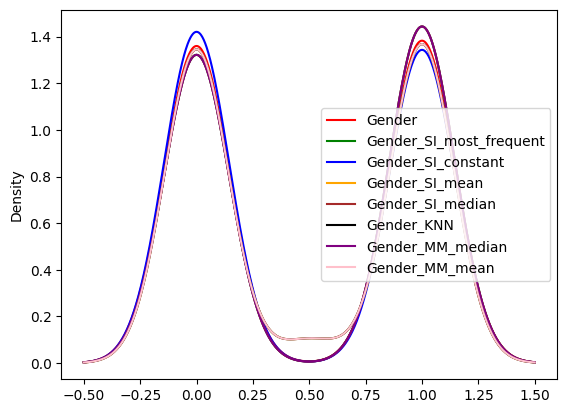

In [ ]:
'''
plotting KDEs for different imputed versions of the Gender variable
'''
fig = plt.figure()
ax = fig.add_subplot(111)
tmp['Gender'].plot(kind = 'kde', ax = ax, color = 'red')
tmp['Gender_SI_most_frequent'].plot(kind = 'kde', ax = ax, color = 'green')
tmp['Gender_SI_constant'].plot(kind = 'kde', ax = ax, color = 'blue')
tmp['Gender_SI_mean'].plot(kind = 'kde', ax = ax, color = 'orange')
tmp['Gender_SI_median'].plot(kind = 'kde', ax = ax, color = 'brown')
tmp['Gender_KNN'].plot(kind = 'kde', ax = ax, color = 'black')
tmp['Gender_MM_median'].plot(kind = 'kde', ax = ax, color = 'purple')
tmp['Gender_MM_mean'].plot(kind = 'kde', ax = ax, color = 'pink')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')
plt.show() 

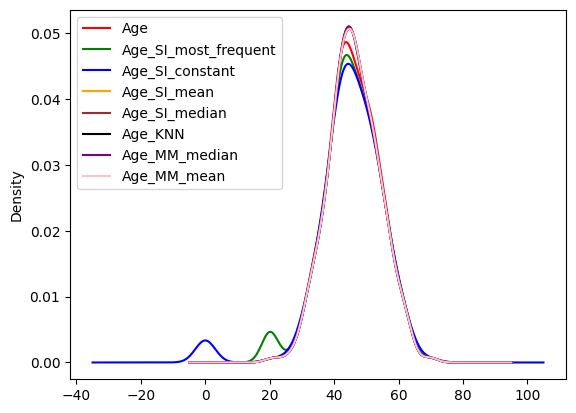

In [ ]:
'''
plotting KDEs for different imputed versions of the Age variable
'''
fig = plt.figure()
ax = fig.add_subplot(111)
tmp['Age'].plot(kind = 'kde', ax = ax, color = 'red')
tmp['Age_SI_most_frequent'].plot(kind = 'kde', ax = ax, color = 'green')
tmp['Age_SI_constant'].plot(kind = 'kde', ax = ax, color = 'blue')
tmp['Age_SI_mean'].plot(kind = 'kde', ax = ax, color = 'orange')
tmp['Age_SI_median'].plot(kind = 'kde', ax = ax, color = 'brown')
tmp['Age_KNN'].plot(kind = 'kde', ax = ax, color = 'black')
tmp['Age_MM_median'].plot(kind = 'kde', ax = ax, color = 'purple')
tmp['Age_MM_mean'].plot(kind = 'kde', ax = ax, color = 'pink')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

<Axes: >

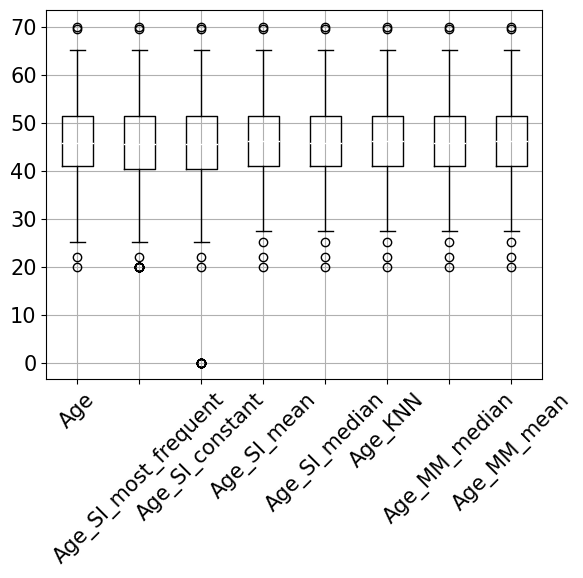

In [ ]:
'''
graphical representation of the distribution of the data with boxplot
'''
tmp[['Age', 'Age_SI_most_frequent', 'Age_SI_constant', 'Age_SI_mean', 'Age_SI_median', 'Age_KNN', 'Age_MM_median', 'Age_MM_mean']].boxplot(rot=45, fontsize=15)

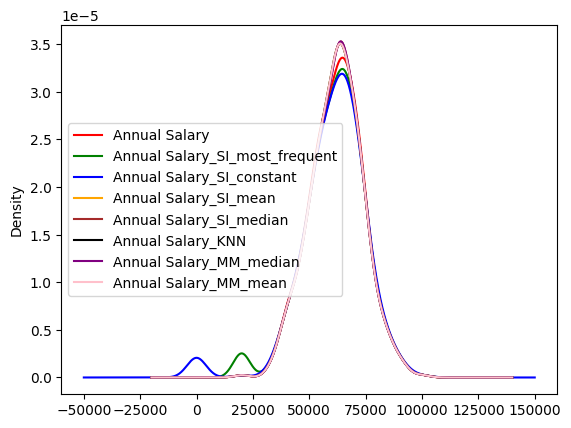

In [ ]:
'''
plotting KDEs for different imputed versions of the Annual Salary variable
'''
fig = plt.figure()
ax = fig.add_subplot(111)
tmp['Annual Salary'].plot(kind = 'kde', ax = ax, color = 'red')
tmp['Annual Salary_SI_most_frequent'].plot(kind = 'kde', ax = ax, color = 'green')
tmp['Annual Salary_SI_constant'].plot(kind = 'kde', ax = ax, color = 'blue')
tmp['Annual Salary_SI_mean'].plot(kind = 'kde', ax = ax, color = 'orange')
tmp['Annual Salary_SI_median'].plot(kind = 'kde', ax = ax, color = 'brown')
tmp['Annual Salary_KNN'].plot(kind = 'kde', ax = ax, color = 'black')
tmp['Annual Salary_MM_median'].plot(kind = 'kde', ax = ax, color = 'purple')
tmp['Annual Salary_MM_mean'].plot(kind = 'kde', ax = ax, color = 'pink')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

<Axes: >

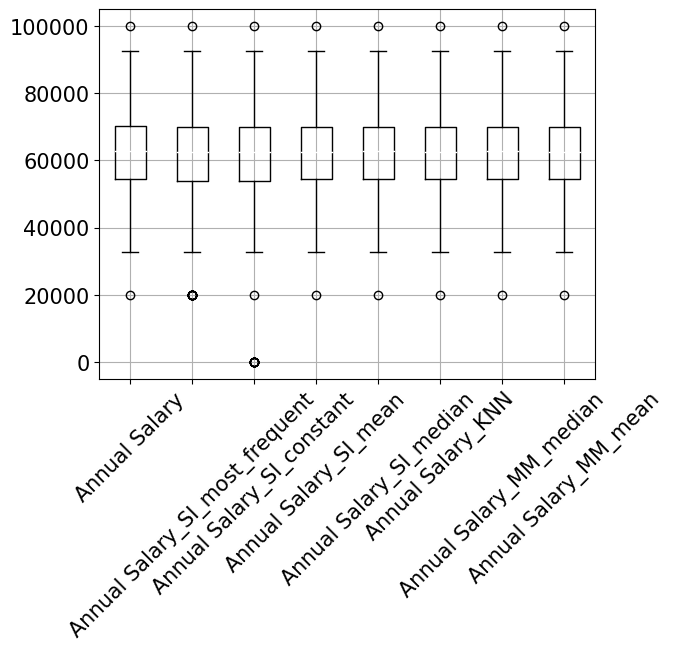

In [ ]:
'''
graphical representation of the distribution of the data with boxplot
'''
tmp[['Annual Salary', 'Annual Salary_SI_most_frequent', 'Annual Salary_SI_constant', 'Annual Salary_SI_mean', 'Annual Salary_SI_median', 'Annual Salary_KNN', 'Annual Salary_MM_median', 'Annual Salary_MM_mean']].boxplot(rot=45, fontsize=15)

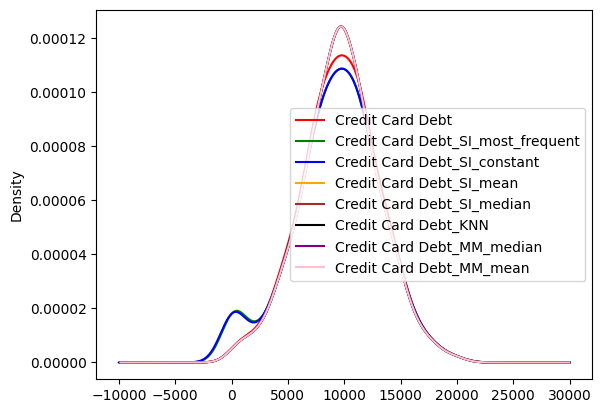

In [ ]:
'''
plotting KDEs for different imputed versions of the Credit Card Debt variable
'''
fig = plt.figure()
ax = fig.add_subplot(111)
tmp['Credit Card Debt'].plot(kind = 'kde', ax = ax, color = 'red')
tmp['Credit Card Debt_SI_most_frequent'].plot(kind = 'kde', ax = ax, color = 'green')
tmp['Credit Card Debt_SI_constant'].plot(kind = 'kde', ax = ax, color = 'blue')
tmp['Credit Card Debt_SI_mean'].plot(kind = 'kde', ax = ax, color = 'orange')
tmp['Credit Card Debt_SI_median'].plot(kind = 'kde', ax = ax, color = 'brown')
tmp['Credit Card Debt_KNN'].plot(kind = 'kde', ax = ax, color = 'black')
tmp['Credit Card Debt_MM_median'].plot(kind = 'kde', ax = ax, color = 'purple')
tmp['Credit Card Debt_MM_mean'].plot(kind = 'kde', ax = ax, color = 'pink')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

<Axes: >

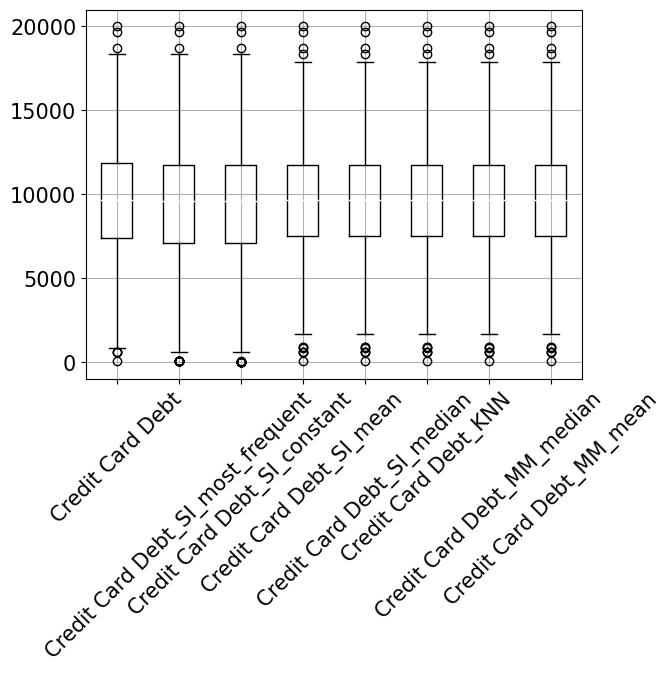

In [ ]:
'''
graphical representation of the distribution of the data with boxplot
'''
tmp[['Credit Card Debt', 'Credit Card Debt_SI_most_frequent', 'Credit Card Debt_SI_constant', 'Credit Card Debt_SI_mean', 'Credit Card Debt_SI_median', 'Credit Card Debt_KNN', 'Credit Card Debt_MM_median', 'Credit Card Debt_MM_mean']].boxplot(rot=45, fontsize=15)

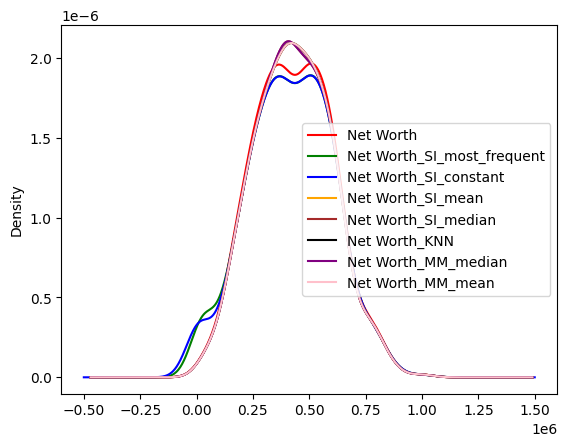

In [ ]:
'''
plotting KDEs for different imputed versions of the Net Worth variable
'''
fig = plt.figure()
ax = fig.add_subplot(111)
tmp['Net Worth'].plot(kind = 'kde', ax = ax, color = 'red')
tmp['Net Worth_SI_most_frequent'].plot(kind = 'kde', ax = ax, color = 'green')
tmp['Net Worth_SI_constant'].plot(kind = 'kde', ax = ax, color = 'blue')
tmp['Net Worth_SI_mean'].plot(kind = 'kde', ax = ax, color = 'orange')
tmp['Net Worth_SI_median'].plot(kind = 'kde', ax = ax, color = 'brown')
tmp['Net Worth_KNN'].plot(kind = 'kde', ax = ax, color = 'black')
tmp['Net Worth_MM_median'].plot(kind = 'kde', ax = ax, color = 'purple')
tmp['Net Worth_MM_mean'].plot(kind = 'kde', ax = ax, color = 'pink')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

<Axes: >

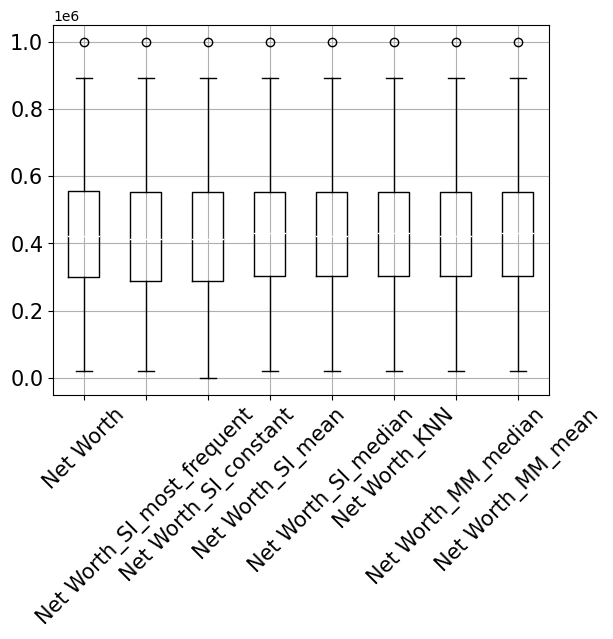

In [ ]:
'''
graphical representation of the distribution of the data with boxplot
'''
tmp[['Net Worth', 'Net Worth_SI_most_frequent', 'Net Worth_SI_constant', 'Net Worth_SI_mean', 'Net Worth_SI_median', 'Net Worth_KNN', 'Net Worth_MM_median', 'Net Worth_MM_mean']].boxplot(rot=45, fontsize=15)

In [ ]:
'''standardizing the numerical features in the data DataFrame using StandardScaler '''
col_names = data.columns
features = data[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

Gender       Age  Annual Salary  Credit Card Debt  Net Worth  \
0 -1.008333 -0.537314       0.061295          0.559951  -1.105321   
1 -1.008333 -0.660824       0.389097         -0.026649   0.585894   
2  0.991735 -0.373508      -0.709189          0.430607   1.208450   
3  0.991735  1.529760       1.476682          1.371336   0.687972   
4  0.991735       NaN      -0.202237               NaN   0.755762   

   Car Purchase Amount  
0            -0.825870  
1             0.084157  
2            -0.119313  
3             2.156820  
4             1.087644

In [ ]:
# checking for numerical values removing target variable
numerical = [x for x in data.columns if data[x].dtype != 'O']

numerical.remove('Car Purchase Amount')
numerical = data[numerical]
numerical

Gender        Age  Annual Salary  Credit Card Debt    Net Worth
0       0.0  41.851720    62812.09301      11609.380910  238961.2505
1       0.0  40.870623    66646.89292       9572.957136  530973.9078
2       1.0  43.152897    53798.55112      11160.355060  638467.1773
3       1.0  58.271369    79370.03798      14426.164850  548599.0524
4       1.0        NaN    59729.15130               NaN  560304.0671
..      ...        ...            ...               ...          ...
495     0.0  41.462515    71942.40291       6995.902524  541670.1016
496     1.0  37.642000    56039.49793      12301.456790  360419.0988
497     1.0  53.943497    68888.77805      10611.606860  764531.3203
498     1.0  59.160509    49811.99062      14013.034510  337826.6382
499     1.0  46.731152    61370.67766       9391.341628  462946.4924

[500 rows x 5 columns]

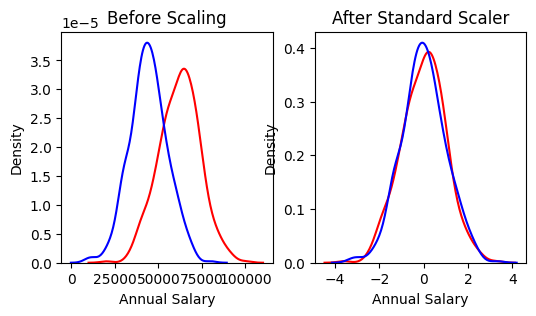

In [ ]:
'''
Generating a figure with two subplots side by side. The left subplot shows the density plot (KDE) of the original unscaled 'Annual Salary' and 'Car Purchase Amount' columns in red and blue, respectively. 
The right subplot shows the same density plots but after scaling using the StandardScaler in red and blue, respectively.
'''
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 3))

ax1.set_title('Before Scaling')
sns.kdeplot(data['Annual Salary'], ax=ax1, color ='red')
sns.kdeplot(data['Car Purchase Amount'], ax=ax1, color ='blue' )

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_features['Annual Salary'], ax=ax2, color ='red')
sns.kdeplot(scaled_features['Car Purchase Amount'], ax=ax2, color ='blue')

plt.show()

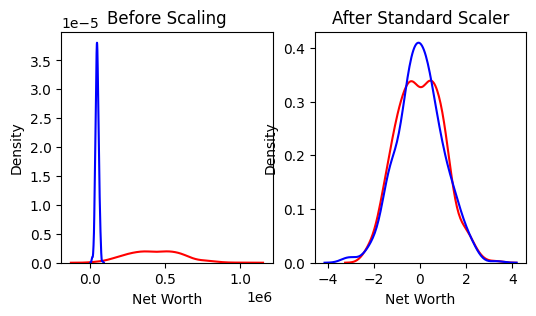

In [ ]:
'''Generating a figure with two subplots side by side. 
The left subplot shows the density plot (KDE) of the original unscaled 'Net Worth' and 'Car Purchase Amount' columns in red and blue, respectively. '''
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 3))

ax1.set_title('Before Scaling')
sns.kdeplot(data['Net Worth'], ax=ax1, color ='red')
sns.kdeplot(data['Car Purchase Amount'], ax=ax1, color ='blue' )

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_features['Net Worth'], ax=ax2, color ='red')
sns.kdeplot(scaled_features['Car Purchase Amount'], ax=ax2, color ='blue')

plt.show()

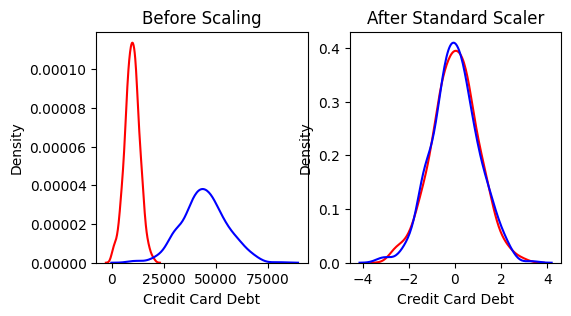

In [ ]:
'''Generating a figure with two subplots side by side. 
The left subplot shows the density plot (KDE) of the original unscaled 'Credit Card Debt' and 'Car Purchase Amount' columns in red and blue, respectively. 
'''
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 3))

ax1.set_title('Before Scaling')
sns.kdeplot(data['Credit Card Debt'], ax=ax1, color ='red')
sns.kdeplot(data['Car Purchase Amount'], ax=ax1, color ='blue' )

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_features['Credit Card Debt'], ax=ax2, color ='red')
sns.kdeplot(scaled_features['Car Purchase Amount'], ax=ax2, color ='blue')

plt.show()

# Step 5. Splitting Dataset

In [ ]:
## setting up Car Purchase Amount as target variable
x = data.drop('Car Purchase Amount', axis = 1).values
y = data['Car Purchase Amount'].values

In [ ]:
## Splitting dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y, 
    test_size = 0.3, 
    random_state = 0
)

In [ ]:
x_train

array([[1.00000000e+00, 4.60280759e+01, 4.93987444e+04, 6.99461732e+03,
        1.74525843e+05],
       [1.00000000e+00, 4.10233918e+01, 5.47423946e+04, 1.03426092e+04,
        4.47393488e+05],
       [           nan, 4.76903105e+01, 5.38704848e+04, 1.47205340e+04,
        7.01782528e+05],
       ...,
       [0.00000000e+00, 3.46819613e+01,            nan, 1.27196442e+04,
        2.44310574e+05],
       [0.00000000e+00, 5.11681390e+01, 5.74783792e+04, 2.23009634e+03,
        1.58979710e+05],
       [0.00000000e+00, 4.01423478e+01, 7.11482025e+04, 7.91765097e+03,
        4.16817467e+05]])

In [ ]:
y_train

array([29425.83001, 36125.48846, 48622.66097, 47760.66427, 59416.18101,
       47240.86004, 52707.96816, 51130.95379, 60567.18837, 49510.03356,
       35911.64559, 27625.44144, 42297.5062 , 29540.87013, 44432.71747,
       41456.68097, 43242.58224, 44463.30502, 45107.22566, 48052.65091,
       32967.20191, 57125.41541, 36517.70996, 49065.1634 , 31491.41457,
       45805.30588, 58641.71051, 63738.39065, 56071.61377, 45271.46081,
       25252.93221, 42484.02283, 34803.82395, 21471.11367, 40093.61981,
       35659.12237, 42905.53815, 39135.03023, 52983.89411, 12895.71468,
       39892.93343, 47869.82593, 60670.33672, 29670.83337, 35457.1486 ,
       42497.72862, 30757.65726, 25971.95673, 44633.99241, 49220.0218 ,
       45977.12502, 39433.40631, 27810.21814, 53110.88052, 35438.80549,
       29092.1311 , 52654.40455, 40095.0498 , 48104.11184, 37084.77621,
       37093.92033, 62864.43011, 22681.71667, 29519.56184, 42925.70921,
       49991.60697, 43901.71244, 38504.39444, 46135.27233, 48300

In [ ]:
## transforming x_train and x_test from numpy into DataFrame
x_train = pd.DataFrame(x_train, columns = ['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth'])
x_test = pd.DataFrame(x_test, columns = ['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth'])

In [ ]:
## checking x_train once more
x_train

Gender        Age  Annual Salary  Credit Card Debt    Net Worth
0       1.0  46.028076    49398.74439       6994.617316  174525.8426
1       1.0  41.023392    54742.39460      10342.609170  447393.4883
2       NaN  47.690311    53870.48483      14720.533990  701782.5280
3       0.0  42.900187    77665.17195      13308.879320  349588.5608
4       1.0  52.864268    65809.10782       4820.839445  692401.4668
..      ...        ...            ...               ...          ...
345     0.0  33.811252    49607.23466       9344.323770  290711.8670
346     0.0  38.551020    69248.49530       6445.784981  298246.0609
347     0.0  34.681961            NaN      12719.644150  244310.5736
348     0.0  51.168139    57478.37922       2230.096344  158979.7102
349     0.0  40.142348    71148.20248       7917.650970  416817.4673

[350 rows x 5 columns]

In [ ]:
## checking x_test DataFrame
x_test

Gender        Age  Annual Salary  Credit Card Debt    Net Worth
0       1.0  49.956014            NaN       8244.470226  173079.1798
1       0.0  45.260364    68499.69447      15436.799680  308445.8598
2       1.0  40.875375    59060.08664       5841.612044  136346.3069
3       0.0  52.610045    76318.87883       6392.211408  245216.1691
4       1.0  38.545834    58632.58875      12035.370790  516817.3173
..      ...        ...            ...               ...          ...
145     1.0        NaN    59729.15130               NaN  560304.0671
146     NaN  39.604810    70381.37499       6718.857016  305253.2658
147     1.0  47.470869    66226.72902       8511.814921  356213.0776
148     0.0  44.353617    56437.30404      10461.982760  249182.7848
149     1.0  56.824893    68499.85162      14179.472440  428485.3604

[150 rows x 5 columns]

# Missing Values

### Continious variables

### Finding discrete variables

In [ ]:
## Checking for the discrete variables
discrete = []
for var in numerical:
    if len(data[var].unique()) < 20 :
        print(var,'values: ', data[var].unique())
        discrete.append(var)
print()
print('There are {} discrete var'. format (len(discrete)))    

Gender values:  [ 0.  1. nan]

There are 1 discrete var


In [ ]:
## using imputer pipepline for imputaion
numeric_features_mean = ['Gender']
numeric_features_median = ['Age',
                          'Annual Salary', 'Credit Card Debt', 'Net Worth']
numeric_mean_imputer = Pipeline (steps = [('imputer', SimpleImputer(strategy = 'mean')),])
numeric_median_imputer = Pipeline (steps = [('imputer', SimpleImputer(strategy = 'median')),])

preprocessor = ColumnTransformer(transformers = [('mean_imputer', numeric_mean_imputer, numeric_features_mean),
                                                 ('median_imputer', numeric_median_imputer, numeric_features_median)],
                                 remainder = 'passthrough')  

In [ ]:
## fitting x_train into preprocessor
preprocessor.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['Gender']),
                                ('median_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Age', 'Annual Salary', 'Credit Card Debt',
                                  'Net Worth'])])

In [ ]:
## checking for the preprocessor transformers
preprocessor.transformers 

[('mean_imputer', Pipeline(steps=[('imputer', SimpleImputer())]), ['Gender']),
 ('median_imputer',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))]),
  ['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth'])]

In [ ]:
## imputer statistics with the mean imputer
preprocessor.named_transformers_['mean_imputer'].named_steps['imputer'].statistics_

array([0.50442478])

In [ ]:
## imputer statistics with the median imputer
preprocessor.named_transformers_['median_imputer'].named_steps['imputer'].statistics_

array([4.54973249e+01, 6.28519793e+04, 9.68611930e+03, 4.26488746e+05])

In [ ]:
## checking x_train numeric features median
x_train[numeric_features_median].median()

Age                     45.497325
Annual Salary        62851.979285
Credit Card Debt      9686.119304
Net Worth           426488.745900
dtype: float64

In [ ]:
# transforming x_train
## checking for the missing values
x_train = preprocessor.transform(x_train)
np.mean(np.isnan (x_train))

0.0

In [ ]:
# transforming x_test
## checking for the missing values
x_test = preprocessor.transform(x_test)
np.mean(np.isnan (x_test))

0.0

In [ ]:
# transforming x_train into Dataframe with numeric features mean and numeric features median
pd.DataFrame(x_train, columns = numeric_features_mean + numeric_features_median)

Gender        Age  Annual Salary  Credit Card Debt    Net Worth
0    1.000000  46.028076   49398.744390       6994.617316  174525.8426
1    1.000000  41.023392   54742.394600      10342.609170  447393.4883
2    0.504425  47.690311   53870.484830      14720.533990  701782.5280
3    0.000000  42.900187   77665.171950      13308.879320  349588.5608
4    1.000000  52.864268   65809.107820       4820.839445  692401.4668
..        ...        ...            ...               ...          ...
345  0.000000  33.811252   49607.234660       9344.323770  290711.8670
346  0.000000  38.551020   69248.495300       6445.784981  298246.0609
347  0.000000  34.681961   62851.979285      12719.644150  244310.5736
348  0.000000  51.168139   57478.379220       2230.096344  158979.7102
349  0.000000  40.142348   71148.202480       7917.650970  416817.4673

[350 rows x 5 columns]

In [ ]:
## checking y_train
y_train

array([29425.83001, 36125.48846, 48622.66097, 47760.66427, 59416.18101,
       47240.86004, 52707.96816, 51130.95379, 60567.18837, 49510.03356,
       35911.64559, 27625.44144, 42297.5062 , 29540.87013, 44432.71747,
       41456.68097, 43242.58224, 44463.30502, 45107.22566, 48052.65091,
       32967.20191, 57125.41541, 36517.70996, 49065.1634 , 31491.41457,
       45805.30588, 58641.71051, 63738.39065, 56071.61377, 45271.46081,
       25252.93221, 42484.02283, 34803.82395, 21471.11367, 40093.61981,
       35659.12237, 42905.53815, 39135.03023, 52983.89411, 12895.71468,
       39892.93343, 47869.82593, 60670.33672, 29670.83337, 35457.1486 ,
       42497.72862, 30757.65726, 25971.95673, 44633.99241, 49220.0218 ,
       45977.12502, 39433.40631, 27810.21814, 53110.88052, 35438.80549,
       29092.1311 , 52654.40455, 40095.0498 , 48104.11184, 37084.77621,
       37093.92033, 62864.43011, 22681.71667, 29519.56184, 42925.70921,
       49991.60697, 43901.71244, 38504.39444, 46135.27233, 48300

In [ ]:
## using MixMaxScaler as some values appear to be in different dimensions
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

y_scaler = MinMaxScaler()

y_train = y_train.reshape(-1, 1)
y_train = y_scaler.fit_transform(y_train)
y_test = y_test.reshape(-1, 1)
y_test = y_scaler.transform(y_test)

In [ ]:
## checking for the shape
x_train.shape, x_test.shape

((350, 5), (150, 5))

In [ ]:
## checking for x_train
x_train

array([[1.        , 0.57552558, 0.3674843 , 0.37081498, 0.13233993],
       [1.        , 0.46486339, 0.43427993, 0.55088089, 0.4191525 ],
       [0.50442478, 0.61228045, 0.42338106, 0.78633995, 0.6865421 ],
       ...,
       [0.        , 0.32464345, 0.53564974, 0.67872558, 0.20569102],
       [0.        , 0.68918123, 0.46847974, 0.11456352, 0.11599931],
       [0.        , 0.445382  , 0.63935253, 0.42045874, 0.38701389]])

# Building Neural Network

In [ ]:
Adam_model, Adam_history = train_ann_GridsearchCV(x_train, y_train, x_test, y_test, optimizer='adam', early_stopping = True)

Streaming output truncated to the last 5000 lines.
Epoch 54/100
3/3 [==============================] - 0s 24ms/step - loss: 9.5286e-04 - val_loss: 0.0011
Epoch 55/100
3/3 [==============================] - 0s 24ms/step - loss: 9.3626e-04 - val_loss: 0.0011
Epoch 56/100
3/3 [==============================] - 0s 22ms/step - loss: 9.0987e-04 - val_loss: 0.0010
Epoch 57/100
3/3 [==============================] - 0s 29ms/step - loss: 9.0006e-04 - val_loss: 0.0010
Epoch 58/100
3/3 [==============================] - 0s 20ms/step - loss: 9.0806e-04 - val_loss: 0.0010
Epoch 59/100
3/3 [==============================] - 0s 19ms/step - loss: 8.6545e-04 - val_loss: 9.6913e-04
Epoch 60/100
3/3 [==============================] - 0s 29ms/step - loss: 8.5162e-04 - val_loss: 9.3750e-04
Epoch 61/100
3/3 [==============================] - 0s 28ms/step - loss: 8.3285e-04 - val_loss: 9.4627e-04
Epoch 62/100
3/3 [==============================] - 0s 22ms/step - loss: 8.2767e-04 - val_loss: 9.1588e-04
Epoch 

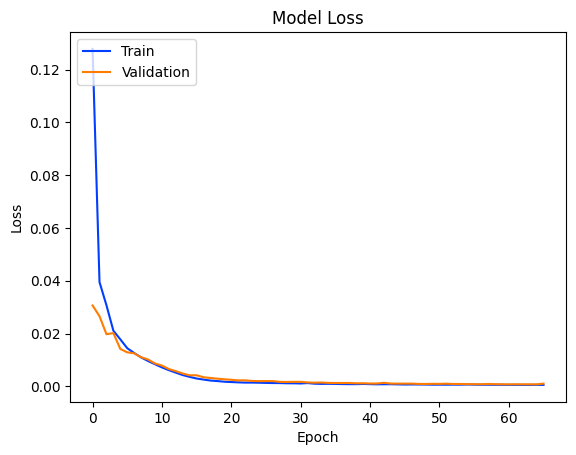

In [ ]:
# Plot the training and validation loss over epochs
plt.plot(Adam_history.history['loss'])
plt.plot(Adam_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
y_pred_Adam = Adam_model.predict(x_test)

5/5 [==============================] - 0s 4ms/step


In [ ]:
calculate_metrics(y_test, y_pred_Adam)

R2: 0.9052
RMSE: 0.0481
MSE: 0.0023


## RMSprop

In [ ]:
RMSprop_model, RMSprop_history = train_ann_GridsearchCV(x_train, y_train, x_test, y_test, optimizer = 'RMSprop', early_stopping = True)

Streaming output truncated to the last 5000 lines.
Epoch 11/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0039 - val_loss: 0.0045
Epoch 12/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0033 - val_loss: 0.0064
Epoch 13/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0025 - val_loss: 0.0066
Epoch 14/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 15/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 15: early stopping
4/4 [==============================] - 0s 3ms/step
Epoch 1/100
6/6 [==============================] - 1s 48ms/step - loss: 0.0604 - val_loss: 0.0212
Epoch 2/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0176 - val_loss: 0.0124
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0122 - val_loss: 0.0091
Epoch 4/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0100 - val_los

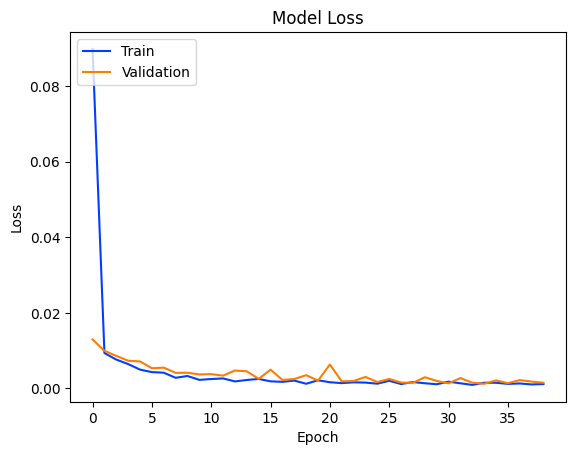

In [ ]:
# Plot the training and validation loss over epochs
plt.plot(RMSprop_history.history['loss'])
plt.plot(RMSprop_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
y_pred_RMSprop = RMSprop_model.predict(x_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
calculate_metrics(y_test, y_pred_RMSprop)

R2: 0.9022
RMSE: 0.0489
MSE: 0.0024


## Adagrad

In [ ]:
Adagrad_model, Adagrad_history = train_ann_GridsearchCV(x_train, y_train, x_test, y_test, optimizer = 'Adagrad', epochs = [50, 100, 150], batch_size = [16, 32, 64], early_stopping = True)

Streaming output truncated to the last 5000 lines.
Epoch 39/150
6/6 [==============================] - 0s 13ms/step - loss: 0.0232 - val_loss: 0.0194
Epoch 40/150
6/6 [==============================] - 0s 13ms/step - loss: 0.0230 - val_loss: 0.0192
Epoch 41/150
6/6 [==============================] - 0s 10ms/step - loss: 0.0228 - val_loss: 0.0191
Epoch 42/150
6/6 [==============================] - 0s 11ms/step - loss: 0.0227 - val_loss: 0.0189
Epoch 43/150
6/6 [==============================] - 0s 10ms/step - loss: 0.0225 - val_loss: 0.0187
Epoch 44/150
6/6 [==============================] - 0s 13ms/step - loss: 0.0224 - val_loss: 0.0186
Epoch 45/150
6/6 [==============================] - 0s 13ms/step - loss: 0.0222 - val_loss: 0.0185
Epoch 46/150
6/6 [==============================] - 0s 14ms/step - loss: 0.0221 - val_loss: 0.0183
Epoch 47/150
6/6 [==============================] - 0s 13ms/step - loss: 0.0220 - val_loss: 0.0182
Epoch 48/150
6/6 [==============================] - 0s 13m

2/2 [==============================] - 0s 3ms/step
Epoch 1/50
3/3 [==============================] - 1s 67ms/step - loss: 0.5168 - val_loss: 0.4215
Epoch 2/50
3/3 [==============================] - 0s 17ms/step - loss: 0.4495 - val_loss: 0.3751
Epoch 3/50
3/3 [==============================] - 0s 16ms/step - loss: 0.3990 - val_loss: 0.3379
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 0.3578 - val_loss: 0.3067
Epoch 5/50
3/3 [==============================] - 0s 16ms/step - loss: 0.3233 - val_loss: 0.2801
Epoch 6/50
3/3 [==============================] - 0s 15ms/step - loss: 0.2937 - val_loss: 0.2568
Epoch 7/50
3/3 [==============================] - 0s 16ms/step - loss: 0.2679 - val_loss: 0.2362
Epoch 8/50
3/3 [==============================] - 0s 16ms/step - loss: 0.2452 - val_loss: 0.2179
Epoch 9/50
3/3 [==============================] - 0s 17ms/step - loss: 0.2251 - val_loss: 0.2015
Epoch 10/50
3/3 [==============================] - 0s 19ms/step - loss: 0.20

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 29ms/step - loss: 0.0222 - val_loss: 0.0213
Epoch 71/150
3/3 [==============================] - 0s 33ms/step - loss: 0.0220 - val_loss: 0.0210
Epoch 72/150
3/3 [==============================] - 0s 28ms/step - loss: 0.0218 - val_loss: 0.0208
Epoch 73/150
3/3 [==============================] - 0s 34ms/step - loss: 0.0216 - val_loss: 0.0205
Epoch 74/150
3/3 [==============================] - 0s 28ms/step - loss: 0.0214 - val_loss: 0.0203
Epoch 75/150
3/3 [==============================] - 0s 30ms/step - loss: 0.0212 - val_loss: 0.0201
Epoch 76/150
3/3 [==============================] - 0s 37ms/step - loss: 0.0211 - val_loss: 0.0199
Epoch 77/150
3/3 [==============================] - 0s 29ms/step - loss: 0.0209 - val_loss: 0.0197
Epoch 78/150
3/3 [==============================] - 0s 33ms/step - loss: 0.0207 - val_loss: 0.0195
Epoch 79/150
3/3 [==============================] - 0s 34ms/step - loss

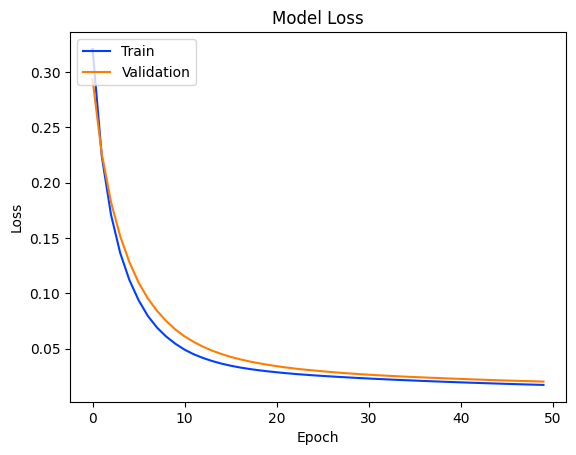

In [ ]:
# Plot the training and validation loss over epochs
plt.plot(Adagrad_history.history['loss'])
plt.plot(Adagrad_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
y_pred_Adagrad = Adagrad_model.predict(x_test)

10/10 [==============================] - 0s 2ms/step


In [ ]:
calculate_metrics(y_test, y_pred_Adagrad)

R2: 0.2514
RMSE: 0.1352
MSE: 0.0183


## Adamax

In [ ]:
Adamax_model, Adamax_history = train_ann_GridsearchCV(x_train, y_train, x_test, y_test, optimizer = 'Adamax', epochs = [100, 200], early_stopping = True)

Streaming output truncated to the last 5000 lines.
Epoch 142/200
6/6 [==============================] - 0s 16ms/step - loss: 6.1567e-04 - val_loss: 5.4808e-04
Epoch 143/200
6/6 [==============================] - 0s 17ms/step - loss: 6.0799e-04 - val_loss: 5.5794e-04
Epoch 144/200
6/6 [==============================] - 0s 18ms/step - loss: 6.0652e-04 - val_loss: 5.5766e-04
Epoch 145/200
6/6 [==============================] - 0s 15ms/step - loss: 5.9955e-04 - val_loss: 5.5425e-04
Epoch 146/200
6/6 [==============================] - 0s 19ms/step - loss: 5.9403e-04 - val_loss: 5.4205e-04
Epoch 147/200
6/6 [==============================] - 0s 20ms/step - loss: 5.8673e-04 - val_loss: 5.2397e-04
Epoch 148/200
6/6 [==============================] - 0s 17ms/step - loss: 5.9293e-04 - val_loss: 4.9837e-04
Epoch 149/200
6/6 [==============================] - 0s 17ms/step - loss: 5.8035e-04 - val_loss: 5.7610e-04
Epoch 150/200
6/6 [==============================] - 0s 19ms/step - loss: 5.7922e-04 

2/2 [==============================] - 0s 5ms/step
Epoch 1/100
3/3 [==============================] - 2s 70ms/step - loss: 0.1730 - val_loss: 0.1148
Epoch 2/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0752 - val_loss: 0.0535
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0363 - val_loss: 0.0288
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0283 - val_loss: 0.0211
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0286 - val_loss: 0.0189
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0273 - val_loss: 0.0166
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0231 - val_loss: 0.0137
Epoch 8/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0185 - val_loss: 0.0113
Epoch 9/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0144 - val_loss: 0.0098
Epoch 10/100
3/3 [==============================] - 0s 19ms/step - 

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 33ms/step - loss: 0.0010 - val_loss: 0.0022
Epoch 99/100
3/3 [==============================] - 0s 30ms/step - loss: 9.8942e-04 - val_loss: 0.0022
Epoch 100/100
2/2 [==============================] - 0s 3ms/step
Epoch 1/100
3/3 [==============================] - 2s 98ms/step - loss: 0.3921 - val_loss: 0.1576
Epoch 2/100
3/3 [==============================] - 0s 32ms/step - loss: 0.1661 - val_loss: 0.0517
Epoch 3/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0616 - val_loss: 0.0175
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0241 - val_loss: 0.0193
Epoch 5/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0215 - val_loss: 0.0324
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0289 - val_loss: 0.0413
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0323 - val_loss: 0.0405
Epoch 8/1

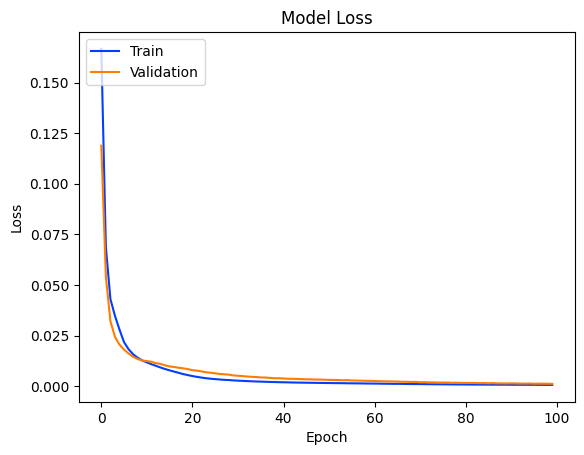

In [ ]:
# Plot the training and validation loss over epochs
plt.plot(Adamax_history.history['loss'])
plt.plot(Adamax_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
y_pred_Adamax = Adamax_model.predict(x_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
calculate_metrics(y_test, y_pred_Adamax)

R2: 0.9203
RMSE: 0.0441
MSE: 0.0019


## Nadam

In [ ]:
Nadam_model, Nadam_history = train_ann_GridsearchCV(x_train, y_train, x_test, y_test, optimizer = 'Nadam', epochs = [100], early_stopping = True)

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 34ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 57/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 58/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 59/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 60/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0013 - val_loss: 0.0027
Epoch 61/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0013 - val_loss: 0.0027
Epoch 62/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 63/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 64/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 65/100
3/3 [==============================] - 0s 21ms/step - loss

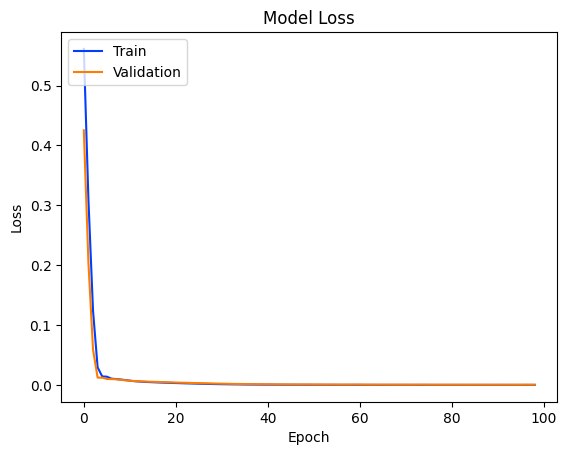

In [ ]:
# Plot the training and validation loss over epochs
plt.plot(Nadam_history.history['loss'])
plt.plot(Nadam_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
y_pred_Nadam = Nadam_model.predict(x_test)

5/5 [==============================] - 0s 5ms/step


In [ ]:
calculate_metrics(y_test, y_pred_Nadam)

R2: 0.9215
RMSE: 0.0438
MSE: 0.0019


## Conclusion

In this project we have trained several models with several optimizers along with GridSearchCV. In order to see the best parameters and to check which optimizer is best fitted. 

1. We used Simple Imputation method for missing data, as it is less time consuming. As we have checked out several imputation methods, yet all of them showed almost same proficiency. 

2. We trained models with early stopping in order not to overtrain model.

3. Almost all models with all optimizers depicted good results, except for the model with Adagrad optimizer. Eventhough, we have tried to train it with quite wide range of parameters, the results remained almost the same. Yet, all other models metrics score and loss scores showed very good results. 